# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [4]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [5]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [6]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [7]:
# describe the numerical features:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [8]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


# check the nulls:

In [9]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [10]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

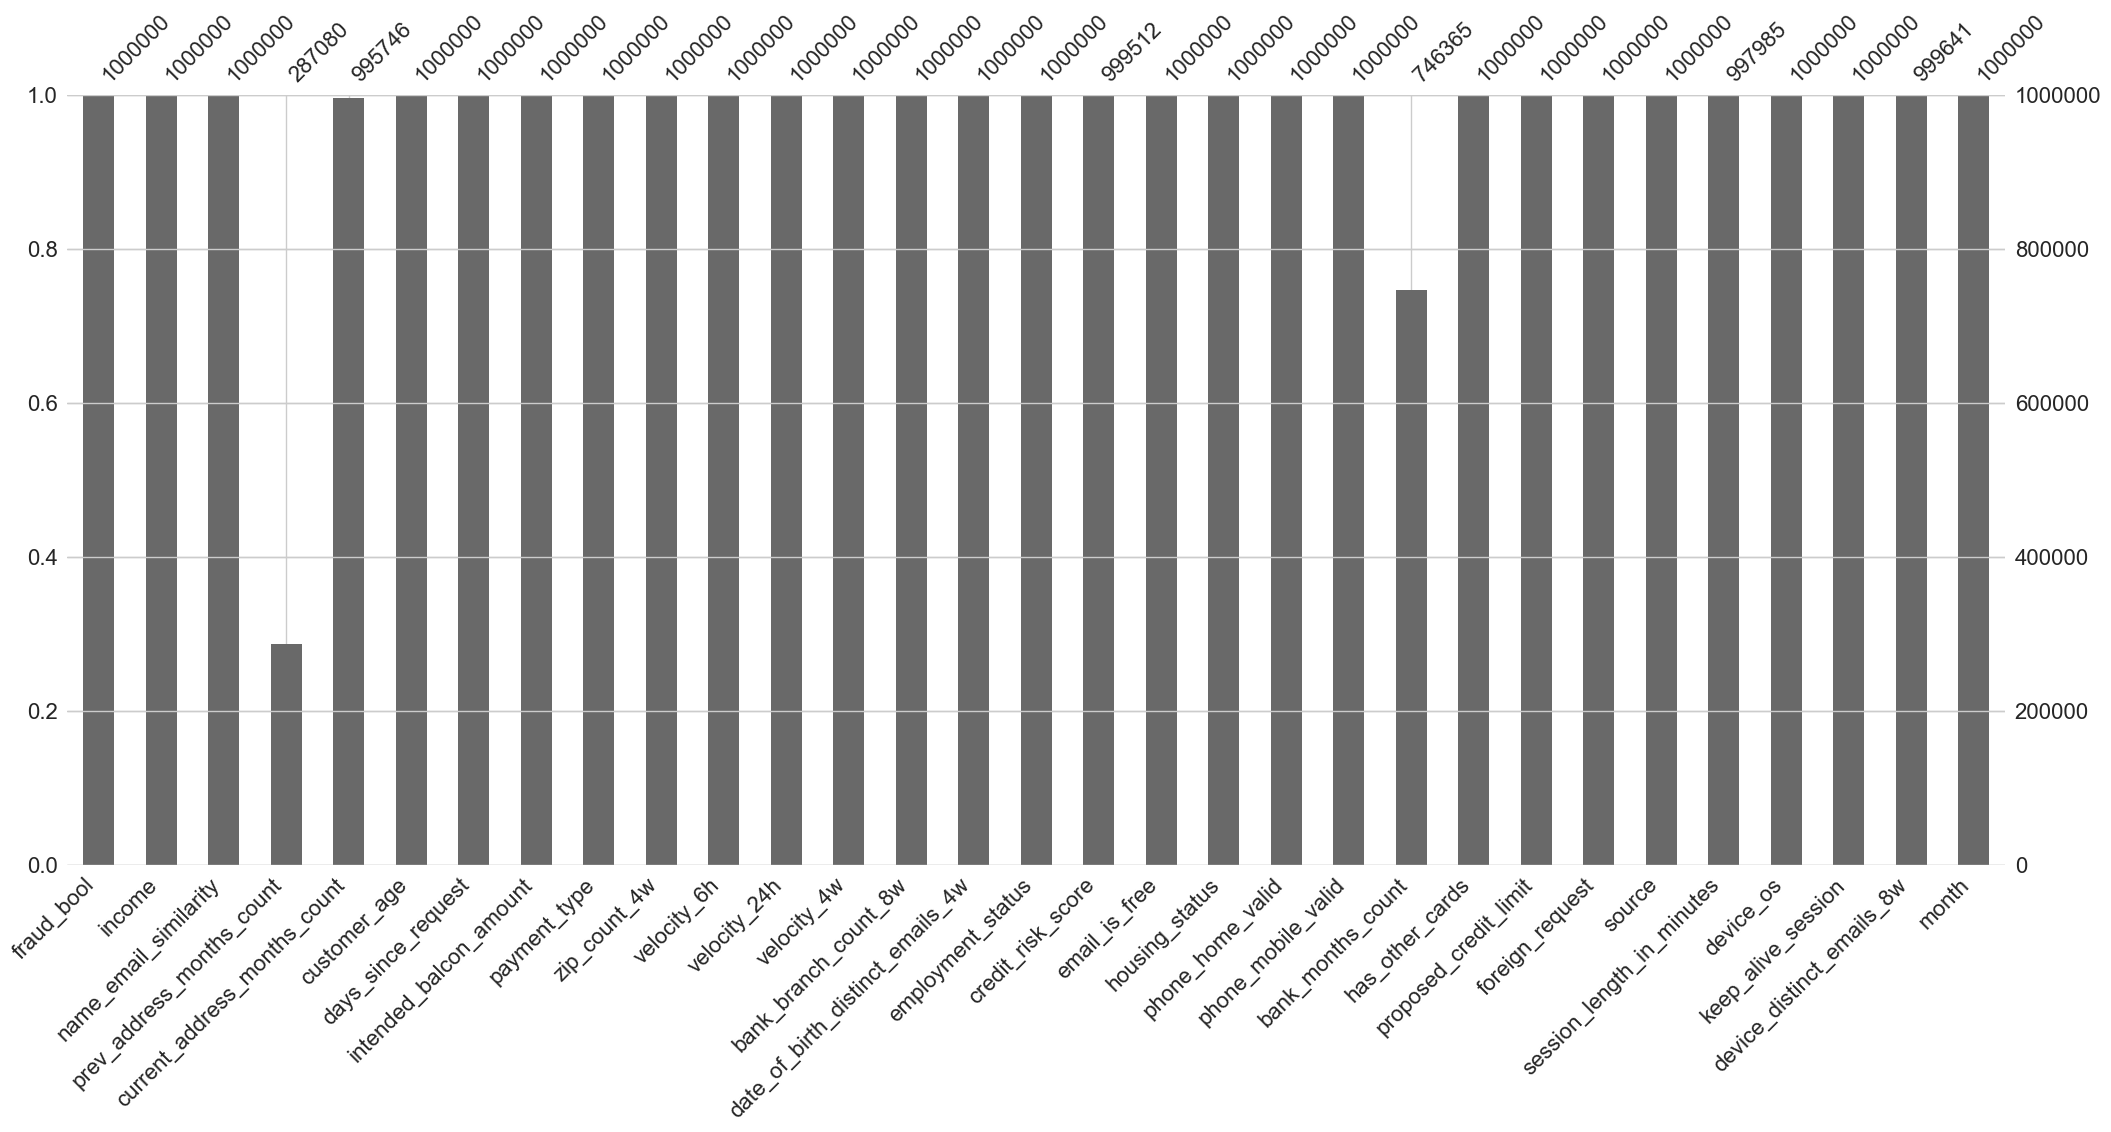

In [11]:
msno.bar(df.data)

<AxesSubplot: >

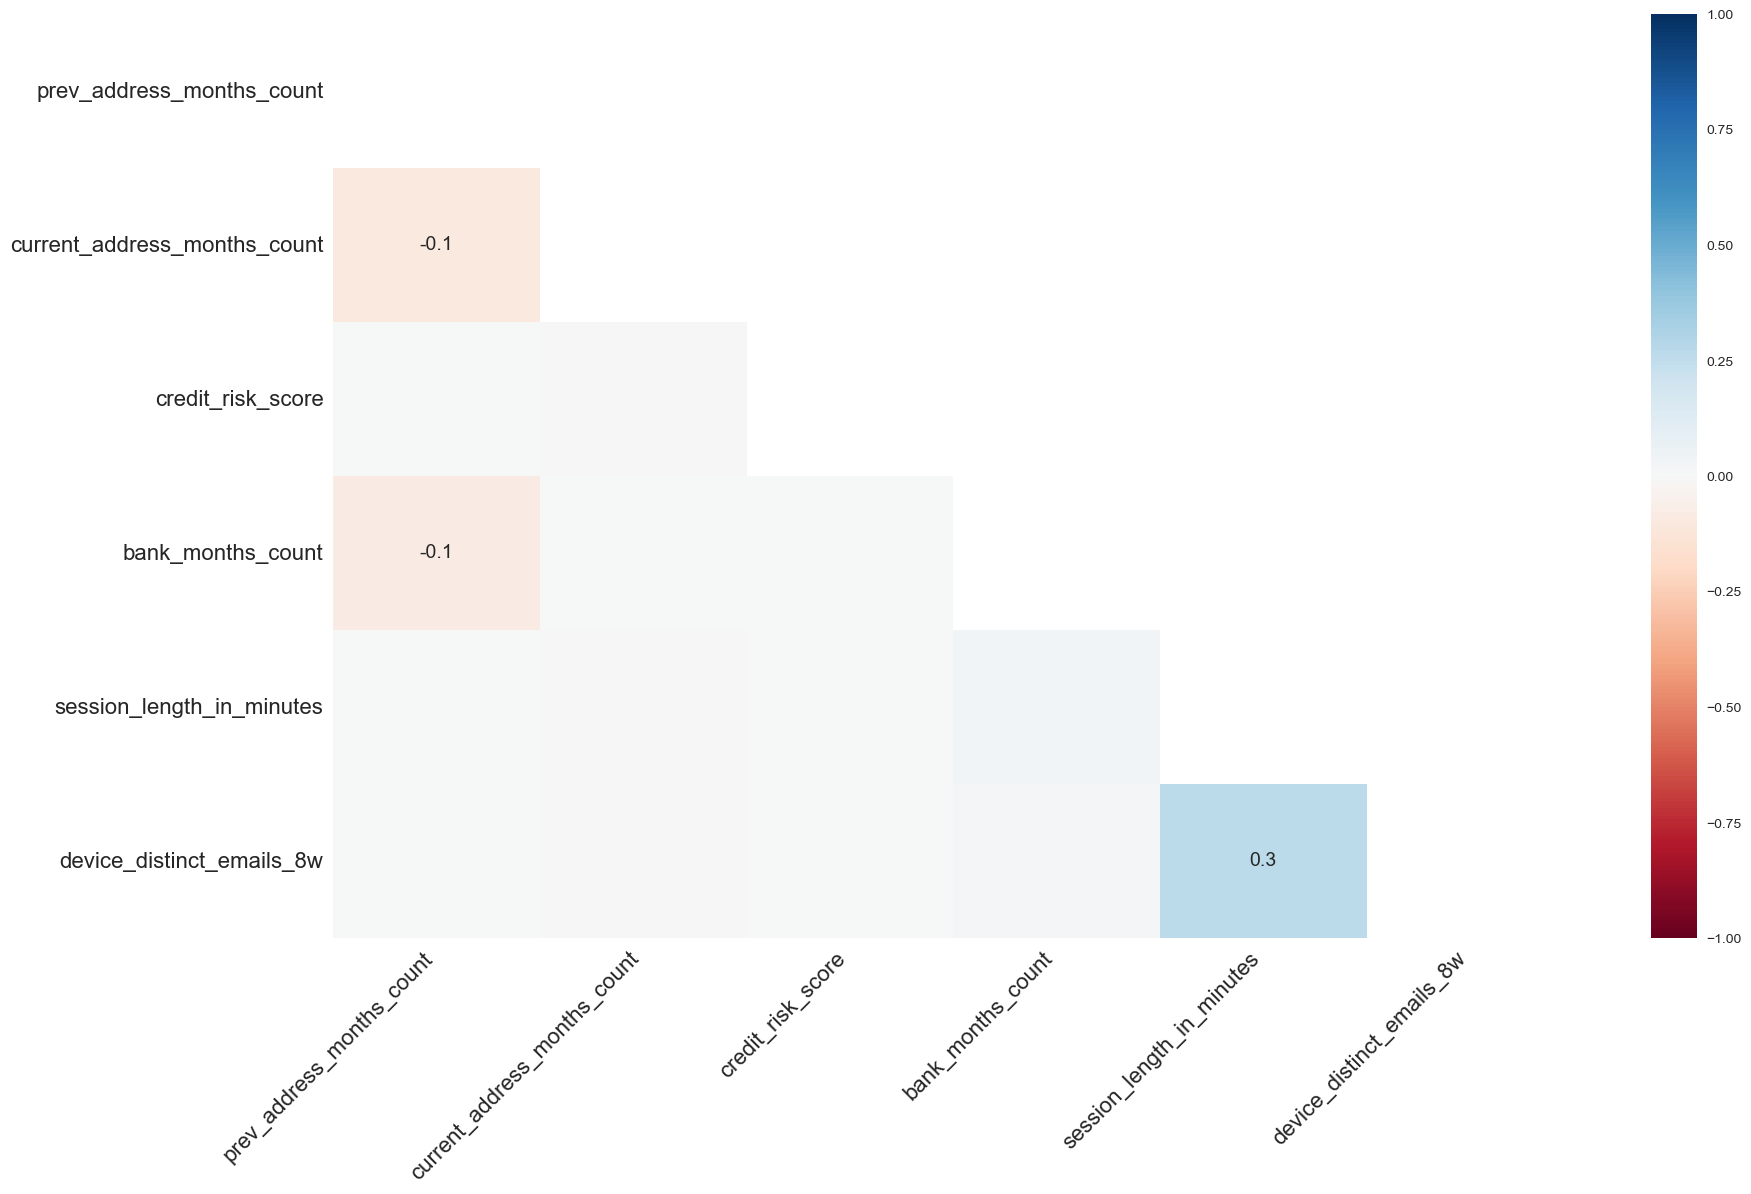

In [12]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

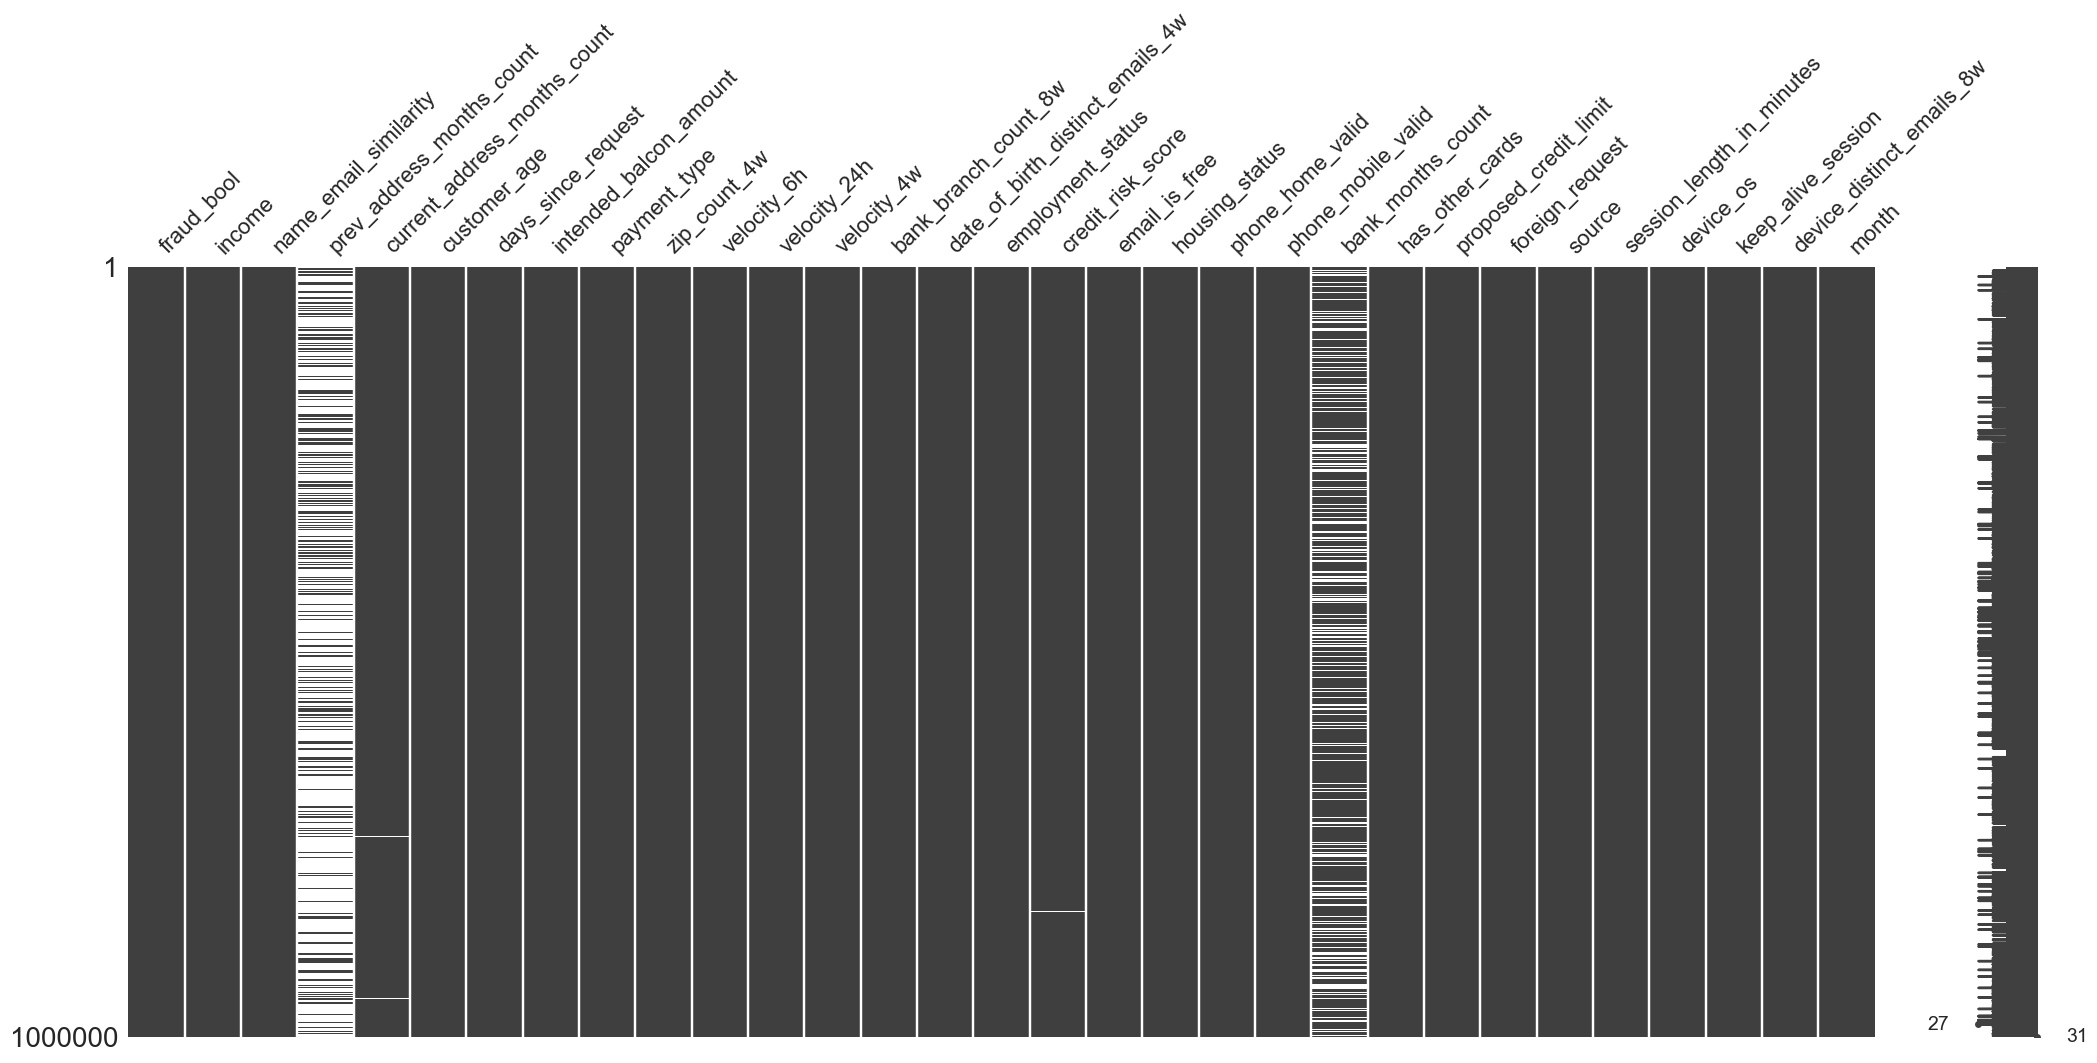

In [13]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [14]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [15]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

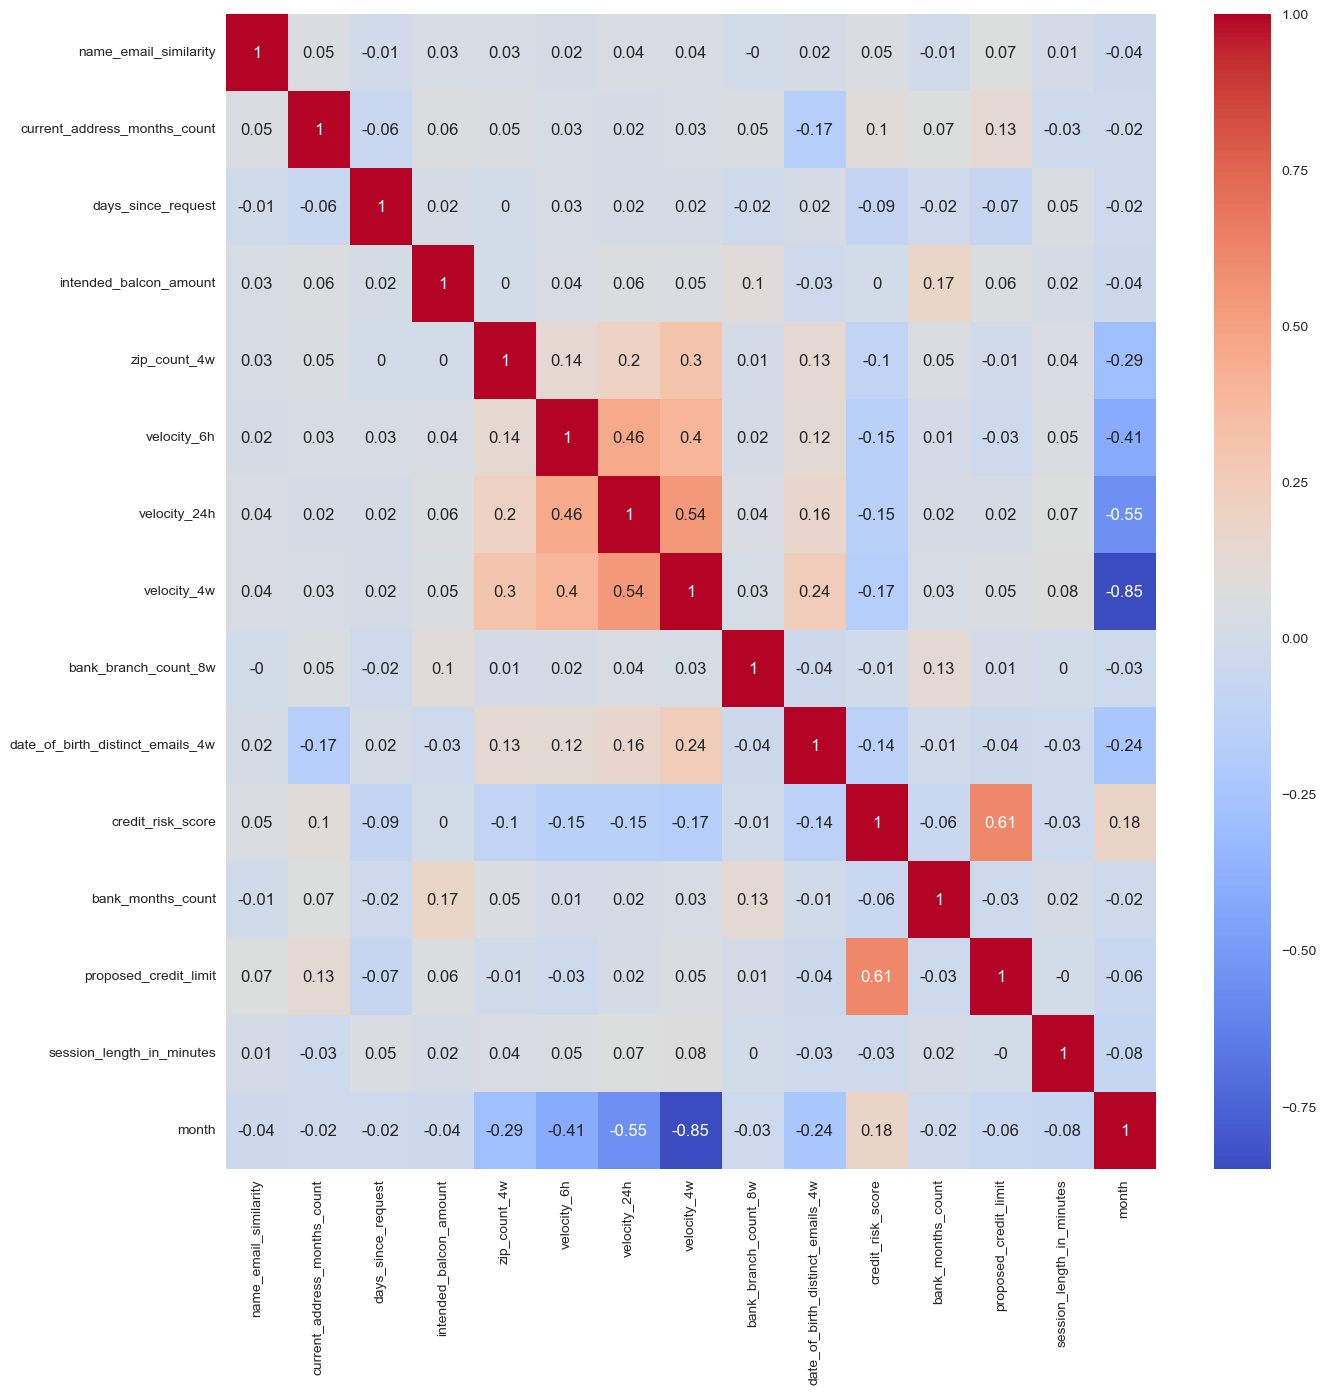

In [16]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

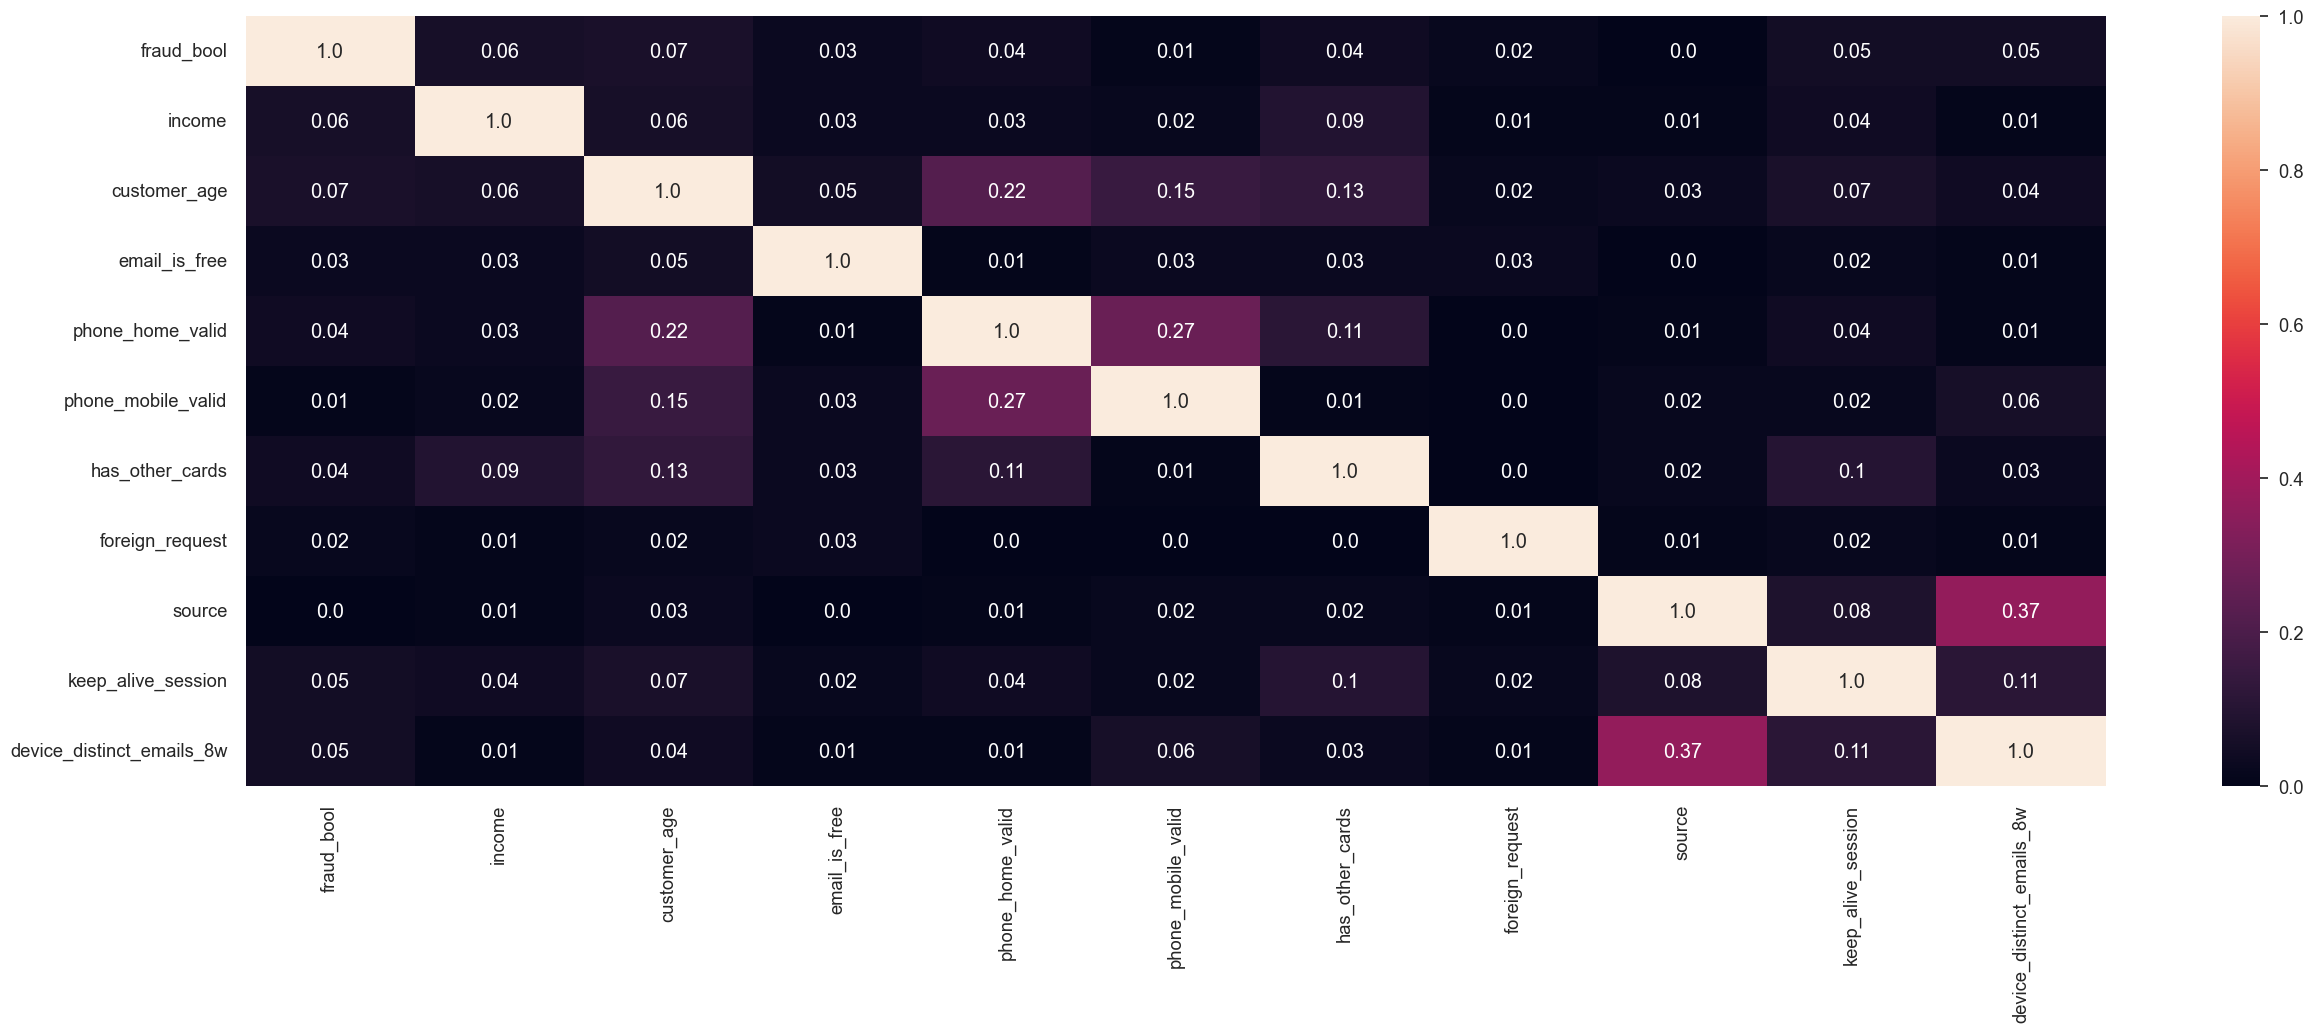

In [17]:
# checking the correlation between the categorical features including the label
df.plot_cramer()

- as we can see there is no correlation between any feature except the correlation between the month and velocity_4w columns, and we willn't pass the month feature to the model, we will only use it as a splitter as mentioned by the authors in the paper.

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


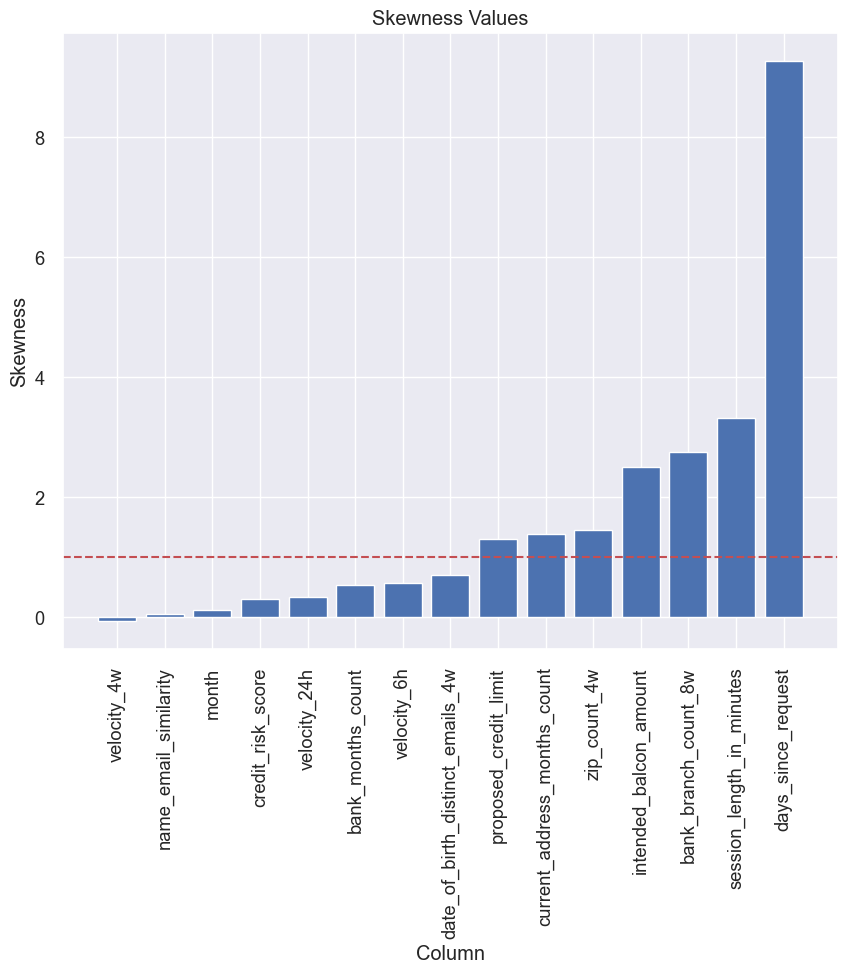

In [18]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [19]:
for column in skewed_columns:
    if column =='intended_balcon_amount':
        continue
    print(df.apply_log_transform(column))

Log transform applied to column 'current_address_months_count' successfully.
Log transform applied to column 'days_since_request' successfully.
Log transform applied to column 'zip_count_4w' successfully.
Log transform applied to column 'bank_branch_count_8w' successfully.
Log transform applied to column 'proposed_credit_limit' successfully.
Log transform applied to column 'session_length_in_minutes' successfully.


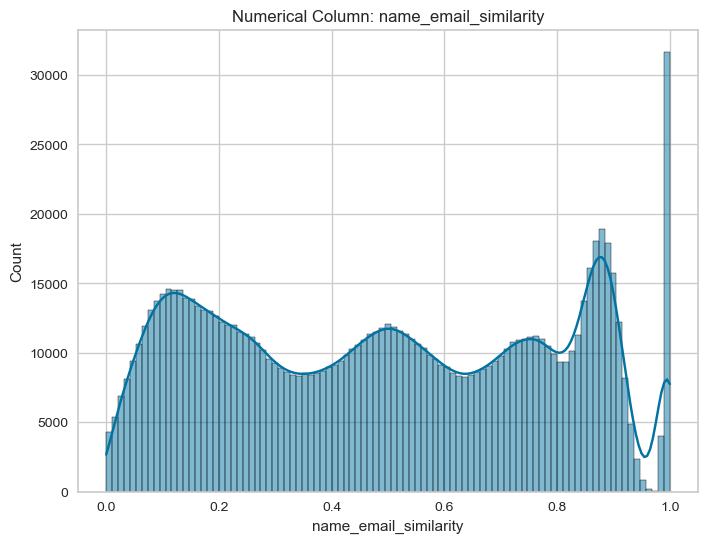

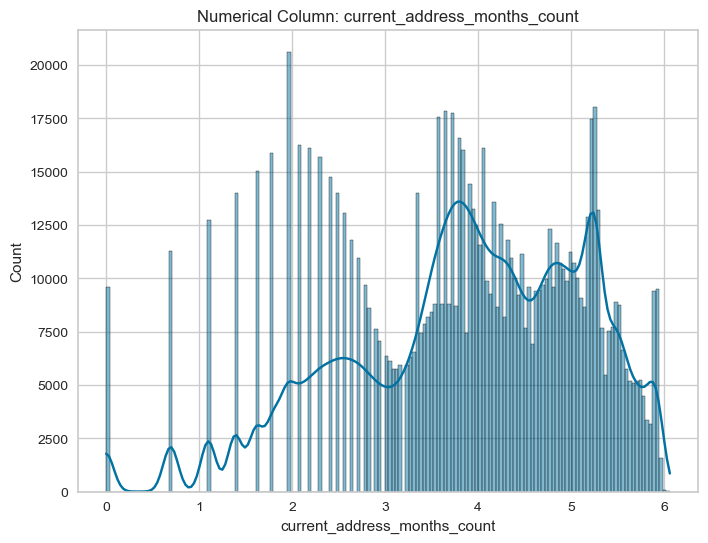

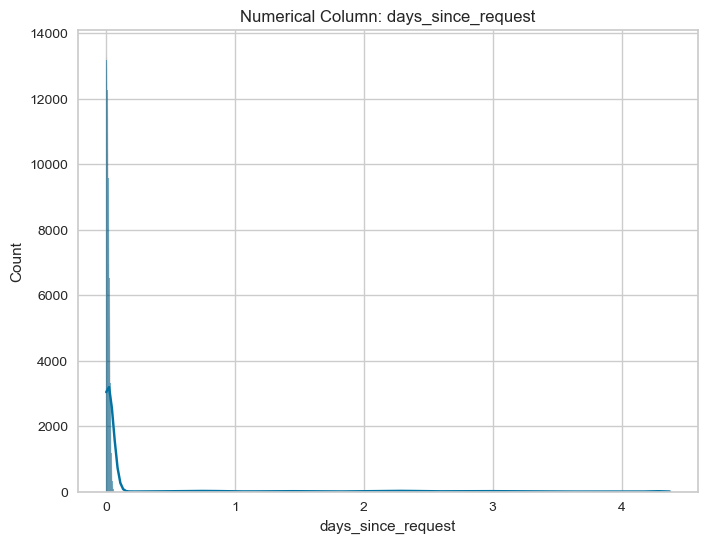

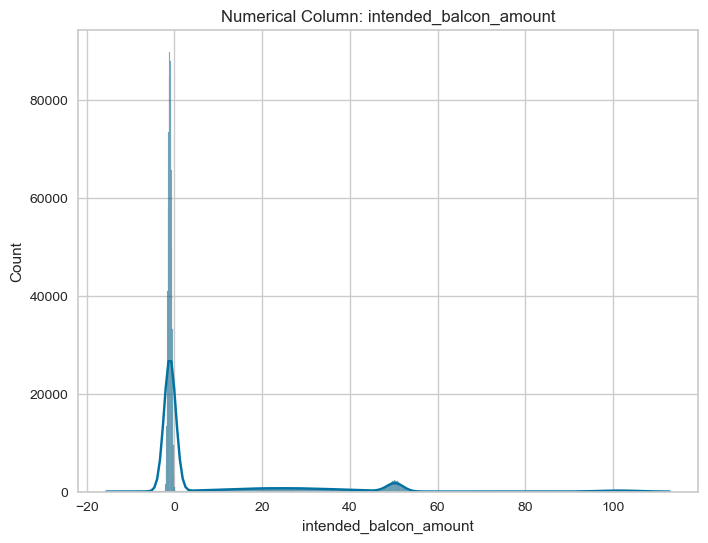

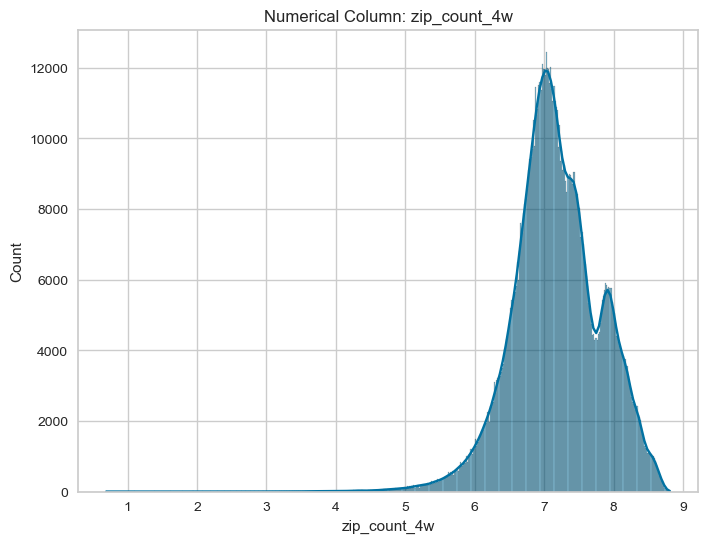

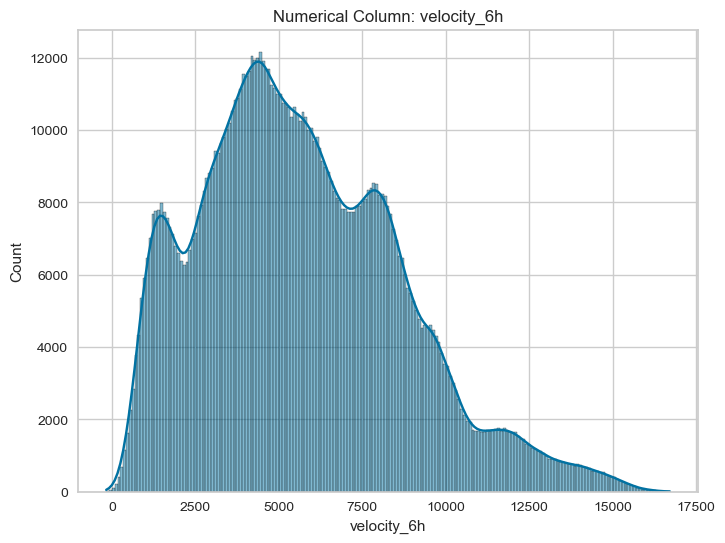

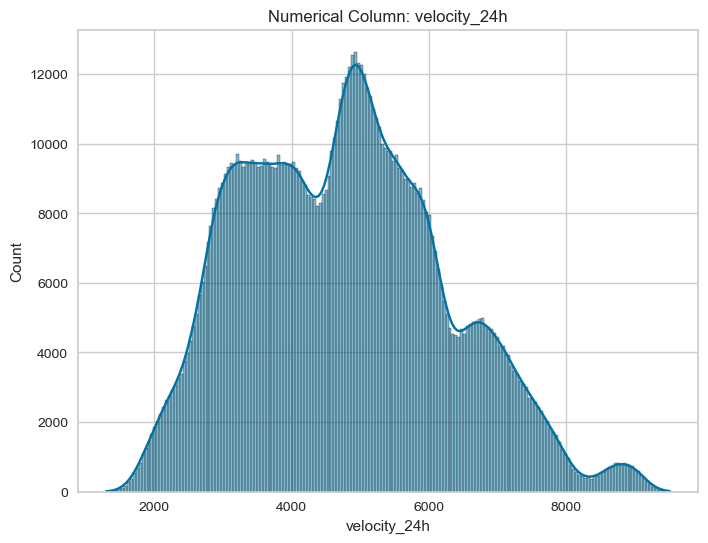

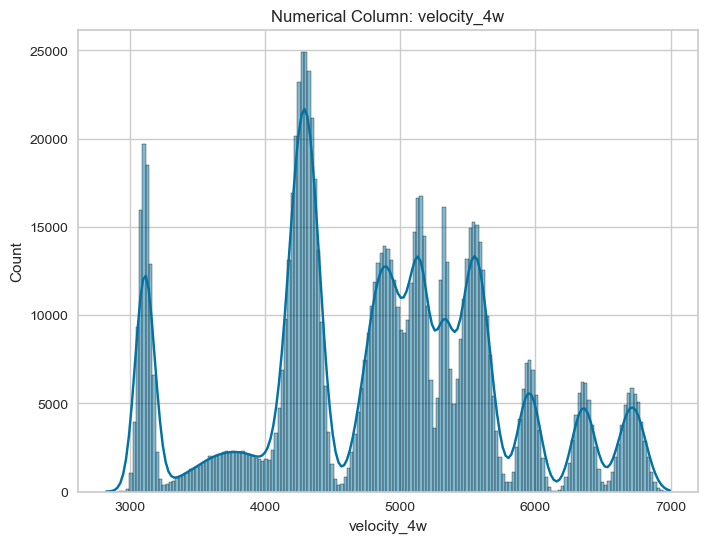

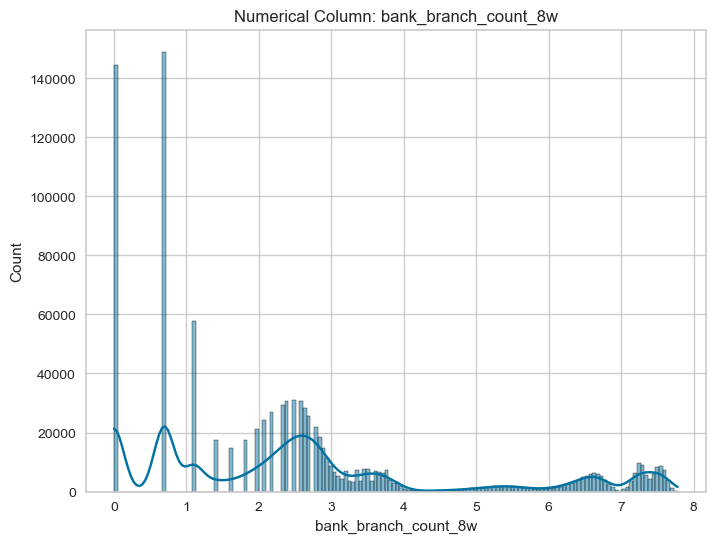

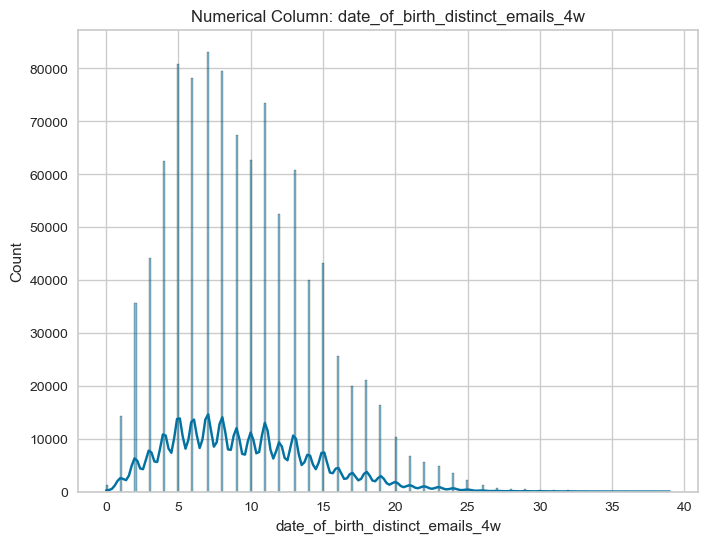

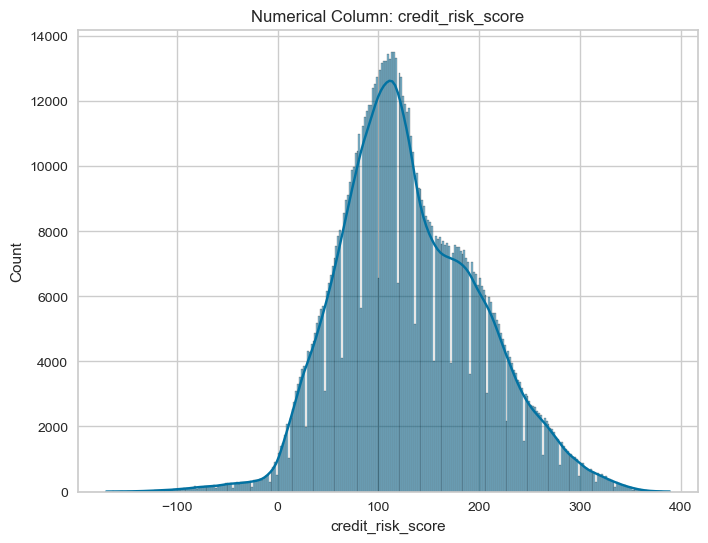

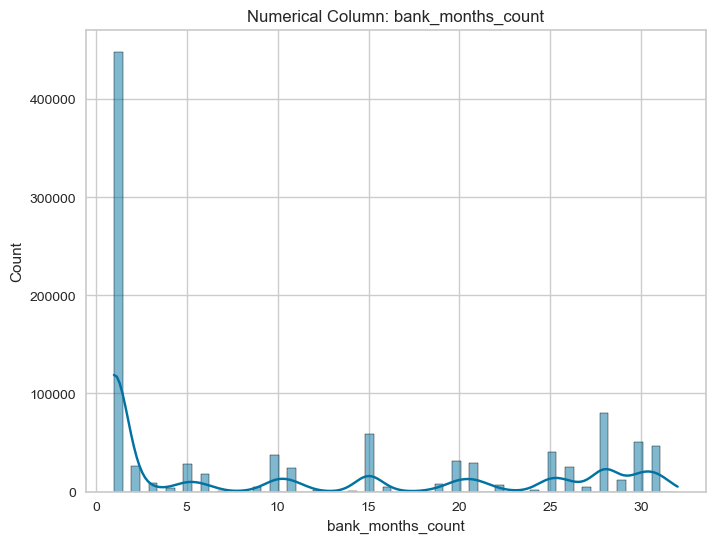

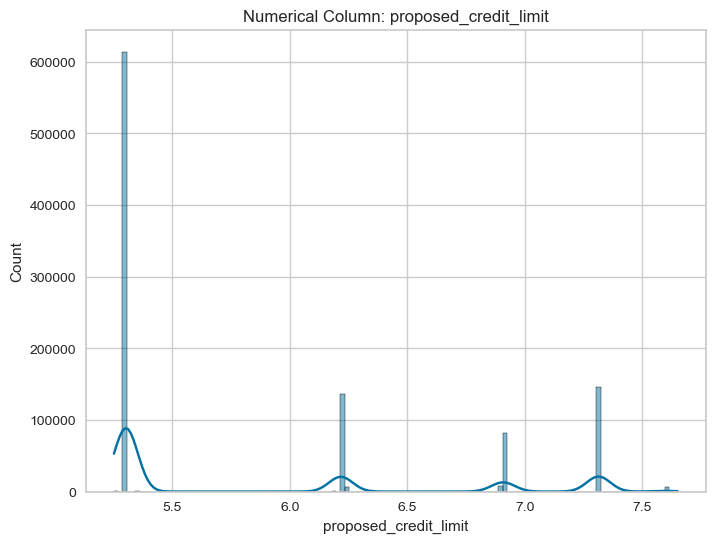

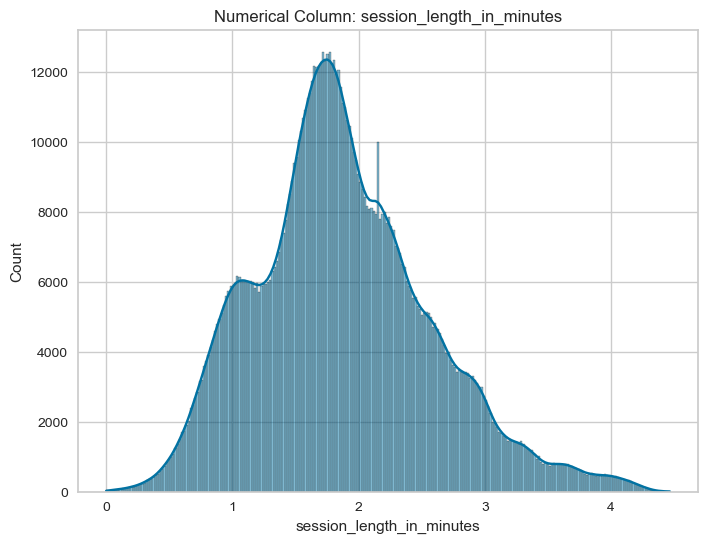

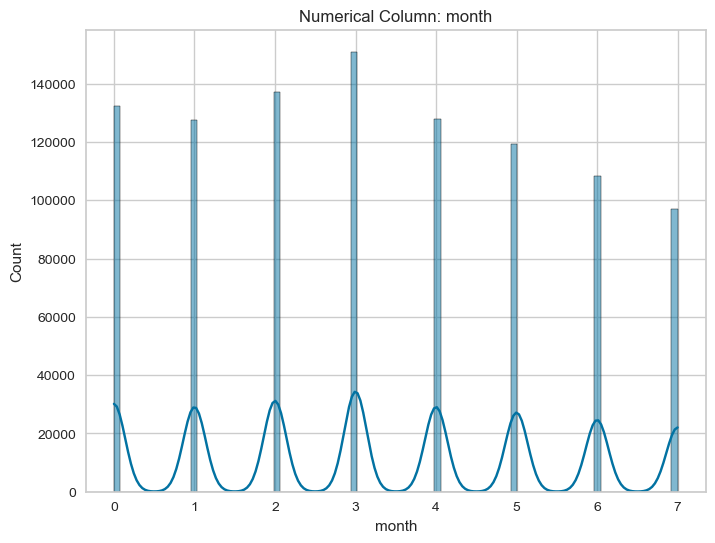

In [30]:
df.plot_numerical_columns()

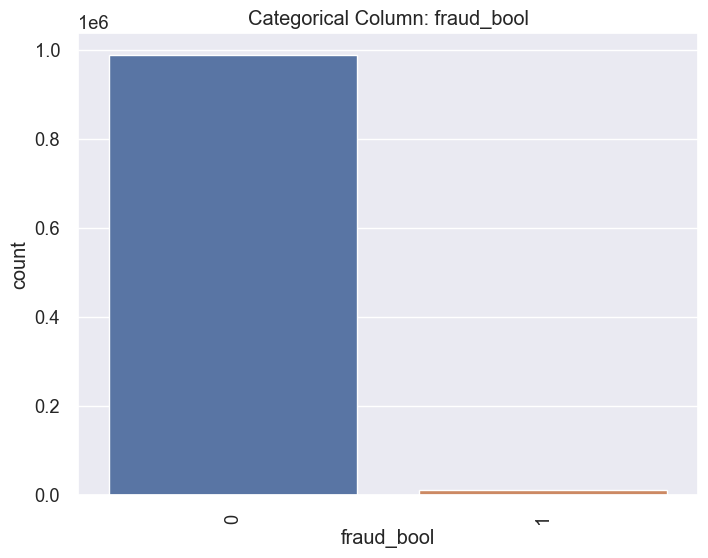

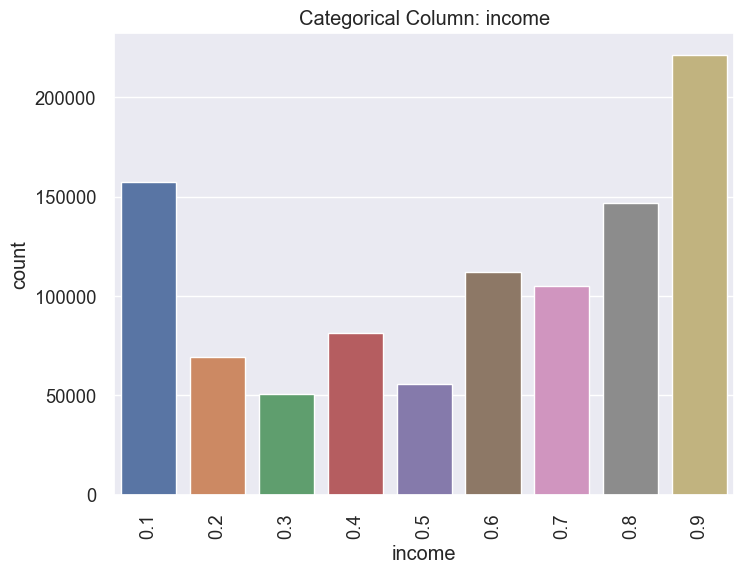

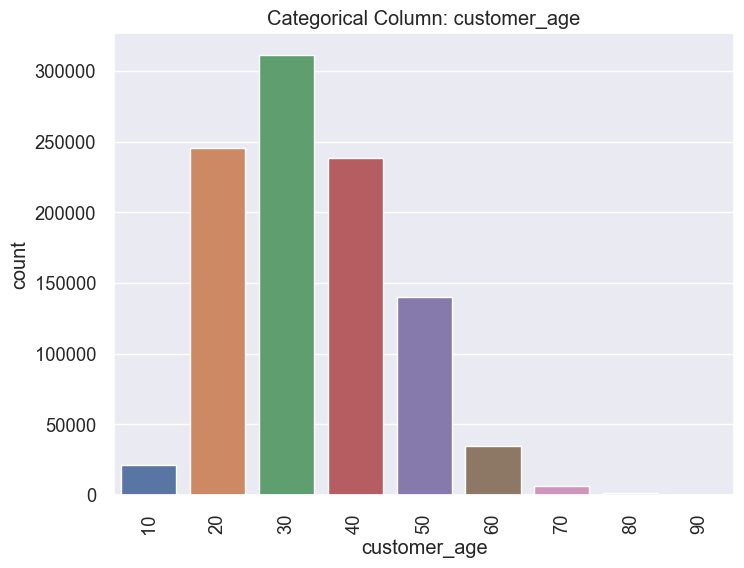

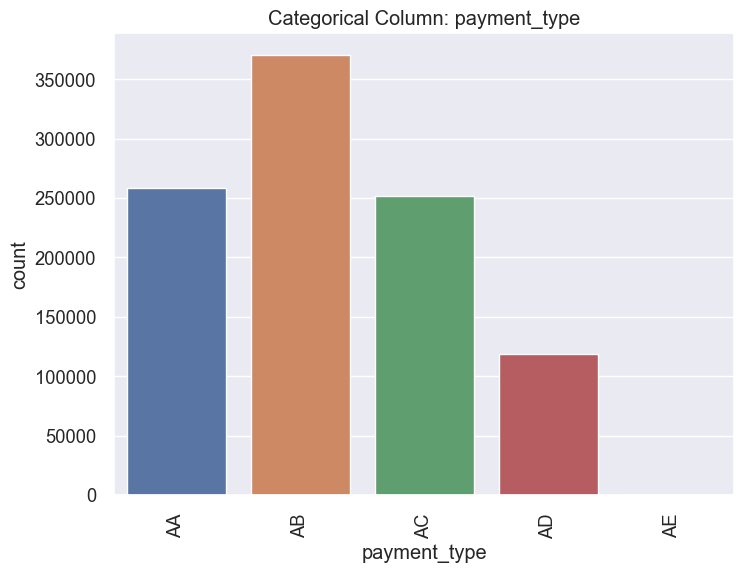

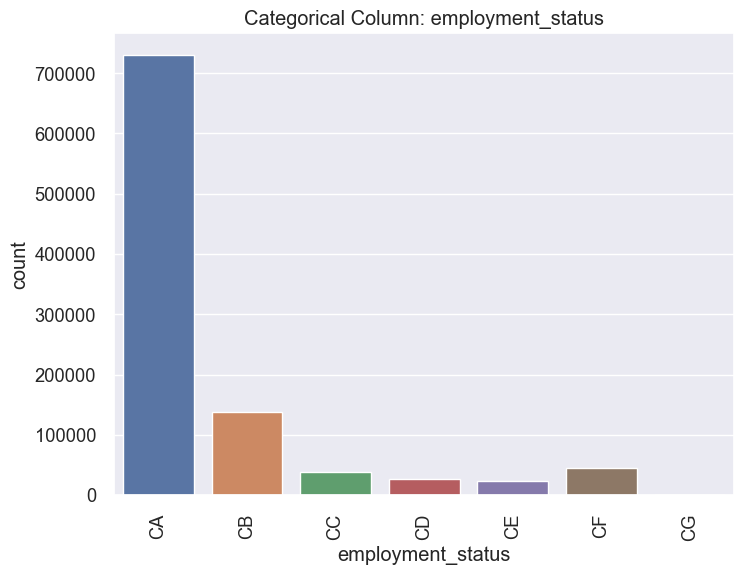

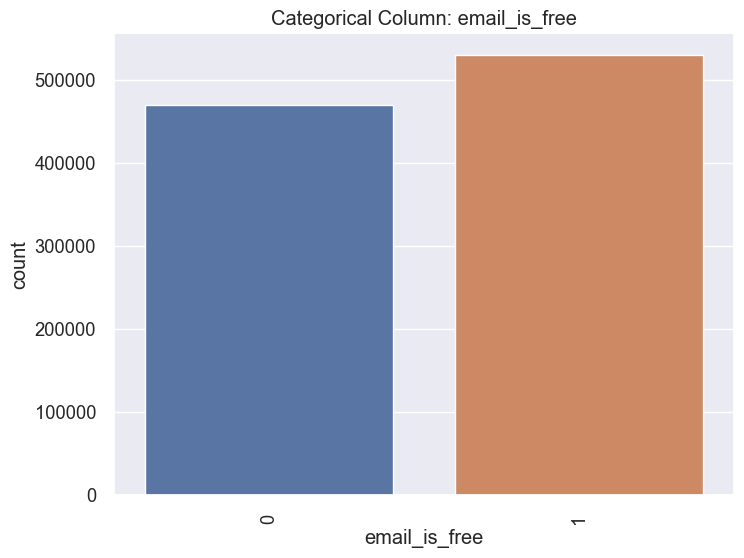

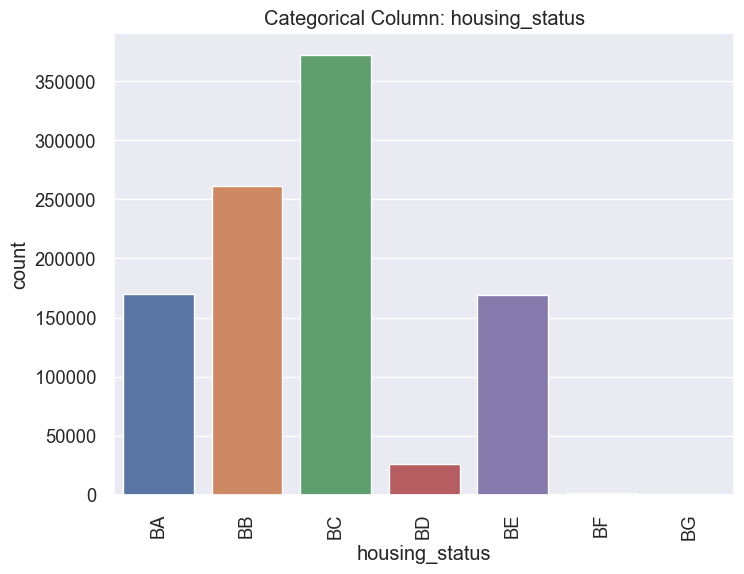

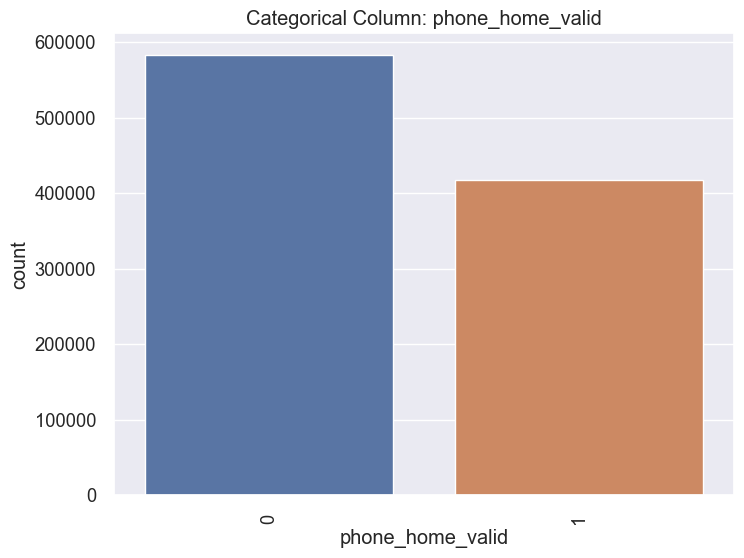

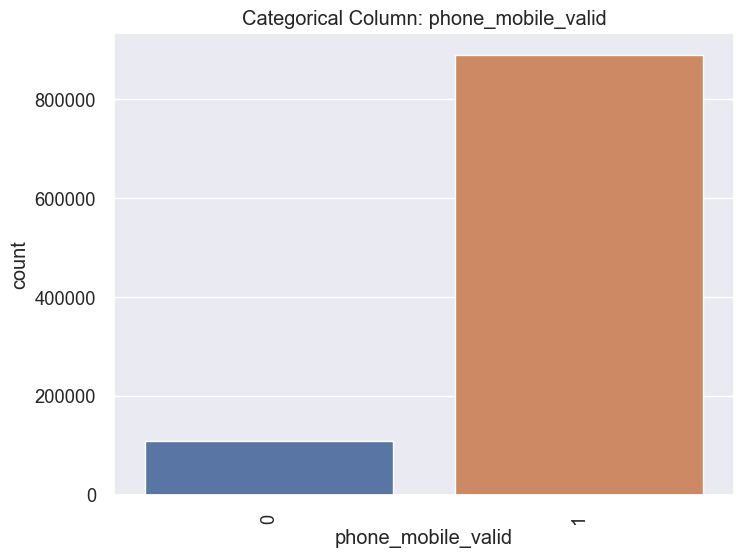

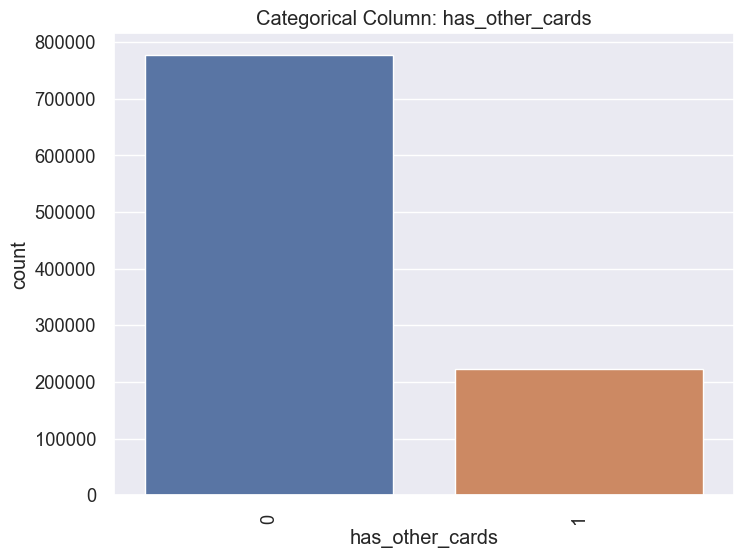

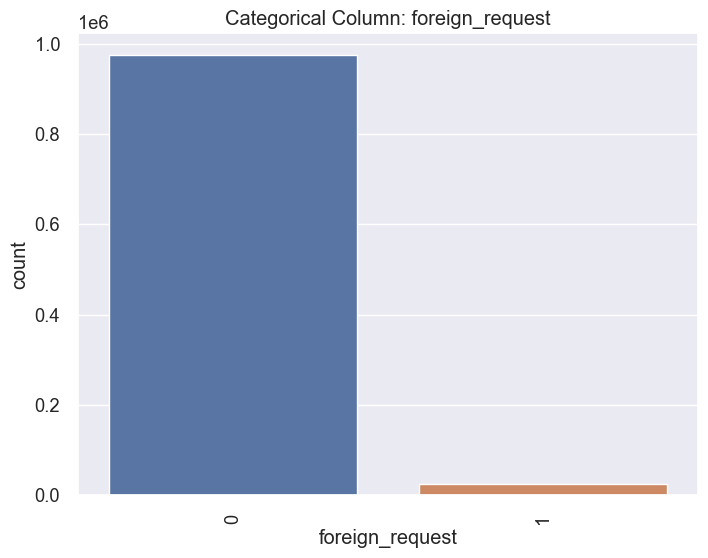

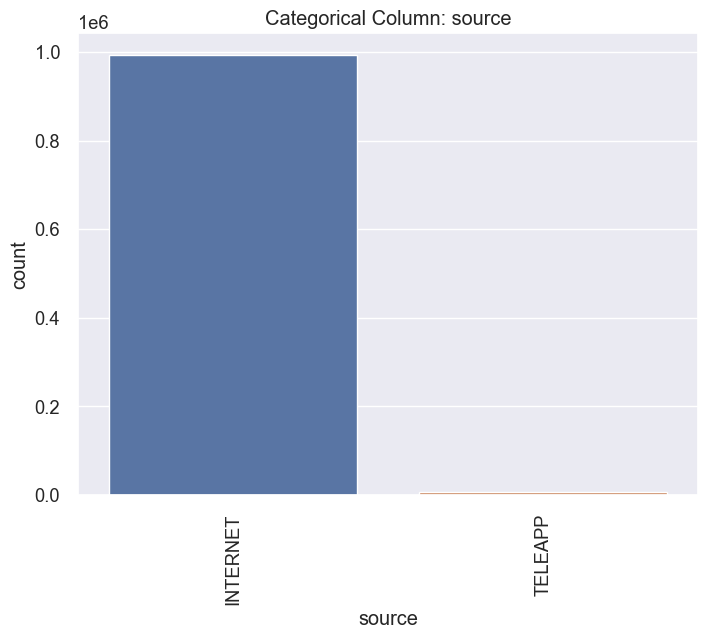

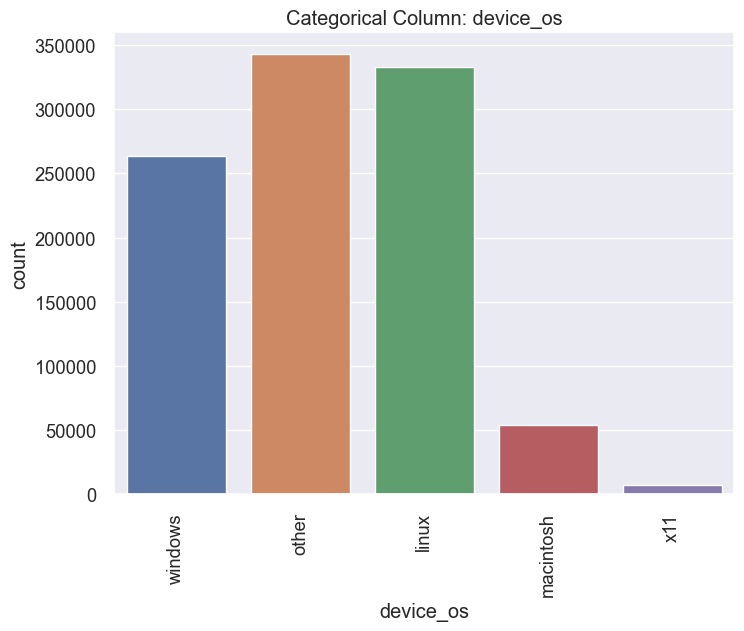

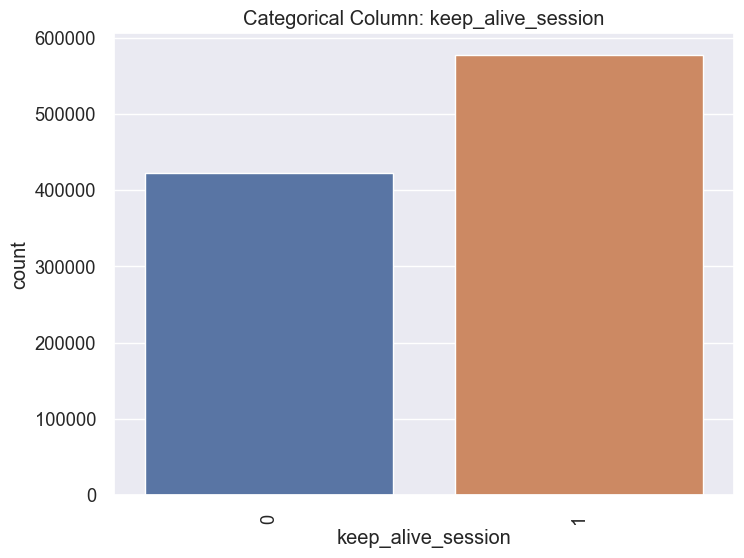

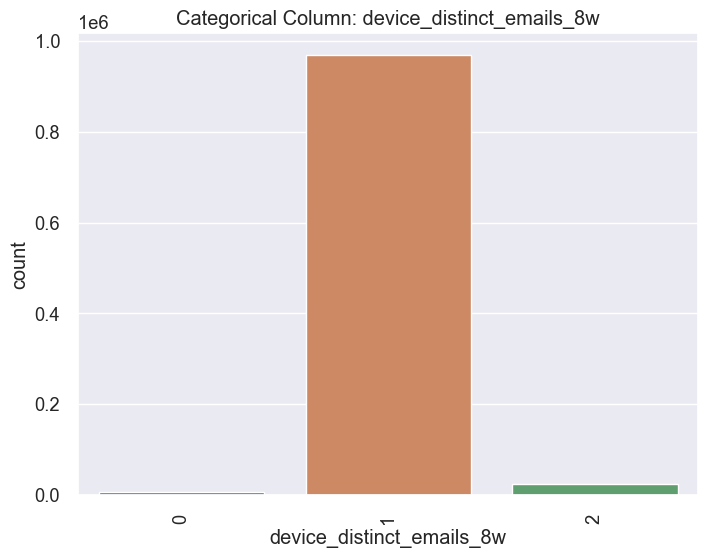

In [32]:
df.plot_categorical_columns()

# Handle the outliers:

In [20]:
df.describe(flag='numerical')

,name_email_similarity,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,3.847946,1.970193e-01,8.661499,7.173563,5665.296605,4769.781965,4856.324016,2.568625,9.503544,131.054037,11.346573,5.886213,1.876368,3.288674
std,0.289125,1.280722,6.440133e-01,20.236155,0.628206,3009.380665,1479.212612,919.843934,2.192405,5.033792,69.620753,11.643213,0.796368,0.696276,2.209994
min,0.000001,0.000000,4.036860e-09,-15.530555,0.693147,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,1.000000,5.252273,0.000872,0.000000
1%,0.021672,0.693147,2.825164e-04,-1.831266,5.517453,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,1.000000,5.303305,0.536846,0.000000
25%,0.225216,2.995732,7.167498e-03,-1.181488,6.796824,3436.365848,3593.179135,4268.368423,0.693147,6.000000,83.000000,1.000000,5.303305,1.416450,1.000000
50%,0.492153,3.970292,1.506174e-02,-0.830507,7.142037,5319.769349,4749.921161,4913.436941,2.302585,9.000000,122.000000,5.000000,5.303305,1.813440,3.000000
75%,0.755567,4.875197,2.599000e-02,4.984176,7.573017,7680.717827,5752.574191,5488.083356,3.258097,13.000000,178.000000,25.000000,6.216606,2.289108,5.000000
99%,0.997470,5.916202,3.135306e+00,100.826524,8.511376,13932.187847,8597.047788,6779.328391,7.588324,23.000000,305.000000,31.000000,7.313887,3.818873,7.000000
max,0.999999,6.061457,4.375215e+00,112.956928,8.810012,16715.565404,9506.896596,6994.764201,7.777374,39.000000,389.000000,32.000000,7.650169,4.464748,7.000000


In [21]:
## i will use the method which we implement in the class this method loop on the numerical features and perform the shapiro test
## to detect if the column is normal or not and return the name of columns with potential outliers.
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

In [22]:
# this function accepts the name of the columns with outliers and clip the values to upper and lower bound
df.handle_outliers(column_with_outliers)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,4.488636,50,0.020709,-1.331345,AA,6.646391,10650.765523,...,24.0,0,6.216606,0,INTERNET,1.586807,windows,0,1,7
1,1,0.9,0.296286,4.976734,50,0.005403,-0.816224,AB,5.905362,534.047319,...,15.0,0,7.313887,0,INTERNET,3.490393,windows,0,1,7
2,1,0.9,0.044985,4.890349,40,0.054224,-0.755728,AC,6.769642,4048.534263,...,1.0,0,5.303305,0,INTERNET,1.745489,other,0,1,7
3,1,0.9,0.159511,3.135494,50,0.018900,-1.205124,AB,6.698268,3457.064063,...,31.0,1,5.303305,0,INTERNET,1.114454,linux,0,1,7
4,1,0.9,0.596414,5.389072,50,0.004431,-0.773276,AB,6.792344,5020.341679,...,31.0,0,7.313887,0,INTERNET,1.563441,macintosh,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,4.653960,40,0.030133,-1.044454,AB,6.690842,7905.711839,...,25.0,0,5.303305,0,INTERNET,2.252502,linux,1,1,4
999996,0,0.8,0.322989,2.302585,50,0.054224,-1.409803,AC,8.103797,5391.470463,...,1.0,0,5.303305,0,INTERNET,2.299366,windows,0,1,4
999997,0,0.8,0.879403,3.433987,20,0.018393,14.232671,AA,7.328437,8063.102636,...,11.0,0,5.303305,0,INTERNET,2.218718,other,0,1,4
999998,0,0.9,0.762112,5.247024,20,0.015235,14.232671,AA,7.257708,8092.641762,...,28.0,0,6.216606,0,INTERNET,1.674488,windows,1,1,4


In [23]:
data=df.get_data()

### splitting the data

In [24]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

### forming the groups to test fairness 

In [25]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [26]:
data = preprocessing(X_train, y_train)


## preprocessing:
- in the baseline experiments we have use the standard scaler and one hot encoding for preprocessing.
- in this experiment i will try different approach by using minmax as scaler and label encoding as encoder

In [27]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('minmax',column)
    scalers[column] = scaler

In [28]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [29]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [30]:
# encode the testset using the encoders fitted on the training set
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)  

In [31]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [32]:
X_train,y_train=data.get_data()

In [33]:
# using random undersampling to handle the imbalanced problem
X_train_res,y_train_res=data.undersample_data()

In [34]:
# the label distribution after resampling
y_train_res.value_counts()

0    8151
1    8151
Name: fraud_bool, dtype: int64

In [35]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [36]:
param_grid = {
'class_weight':['balanced']
}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: LogisticRegression(class_weight='balanced')
Best score: 0.882655563763953
AUC: 0.8812629309113234
TPR:  49.480000000000004% 
FPR:  4.99% 
Threshold:  0.77
Predictive Equality:  85.5%


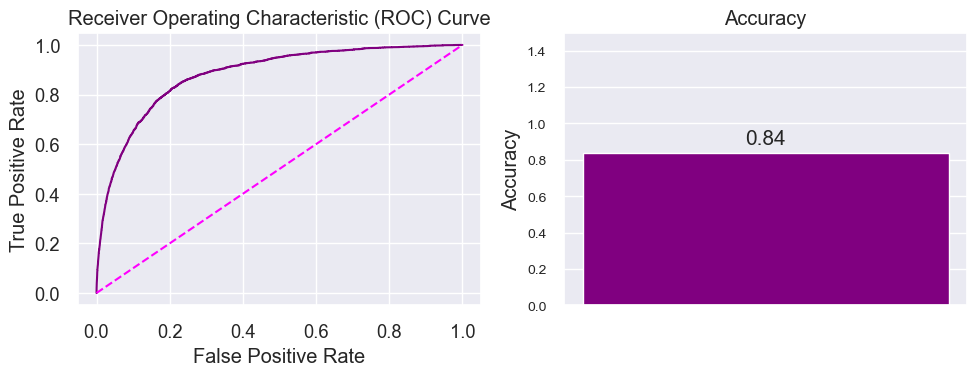

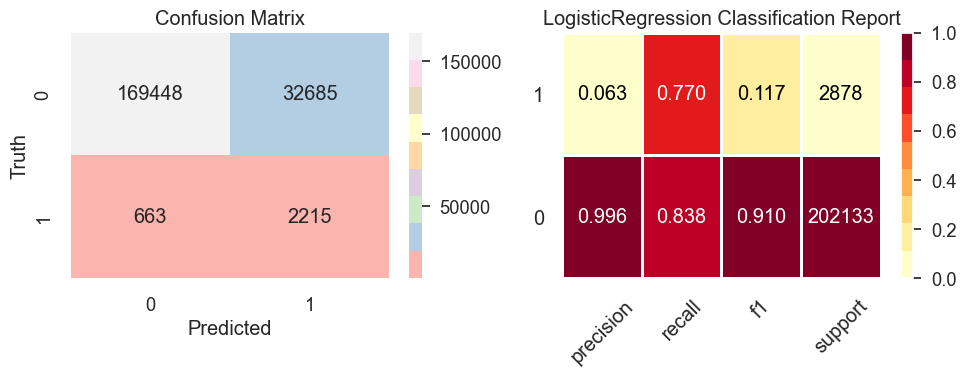

CPU times: total: 5 s
Wall time: 4.17 s


In [37]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [38]:
saved_model_path = experiment.save_model('models/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/logistic_regression_model.pkl


let's compare the results of the three experiments:

**First Experiment - Logistic Regression:**
- AUC: 0.8672208155064458
- TPR: 46.11%
- FPR: 4.99%
- Threshold: 0.77
- Predictive Equality: 89.01%

**Second Experiment - Logistic Regression with Random Oversampling:**
- AUC: 0.8812807481868141
- TPR: 49.69%
- FPR: 4.99%
- Threshold: 0.76
- Predictive Equality: 85.83%

**Third Experiment - Logistic Regression with Random Undersampling:**
- AUC: 0.8812629309113234
- TPR: 49.48%
- FPR: 4.99%
- Threshold: 0.77
- Predictive Equality: 85.5%

Comparison:

1. **AUC:** All three experiments show similar AUC values, indicating that the model's ability to distinguish between positive and negative samples is comparable.

2. **True Positive Rate (TPR):** The TPR in the second experiment (with random oversampling) is slightly higher than in the first and third experiments (with no sampling and random undersampling, respectively). This suggests that random oversampling has improved the model's ability to correctly identify positive samples.

3. **False Positive Rate (FPR):** The FPR is the same in all three experiments, as it depends on the model's ability to correctly classify negative samples.

4. **Threshold:** The threshold values are slightly different, but they are in the same range (0.76 to 0.77) for all experiments.

5. **Predictive Equality:** The first experiment (no sampling) has the highest Predictive Equality score (89.01%), while the second experiment (random oversampling) has the second-highest score (85.83%), and the third experiment (random undersampling) has the lowest score (85.5%). This suggests that the first experiment achieved a better balance in false positives across different groups.

It seems that the first experiment (Logistic Regression without any sampling) achieved the best balance between predictive performance and predictive equality.

# random forest:

In [39]:
param_grid={
    "class_weight":['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced')
Best score: 0.8742367945521651
AUC: 0.8779141271405093
TPR:  49.27% 
FPR:  4.859999999999999% 
Threshold:  0.74
Predictive Equality:  98.54%


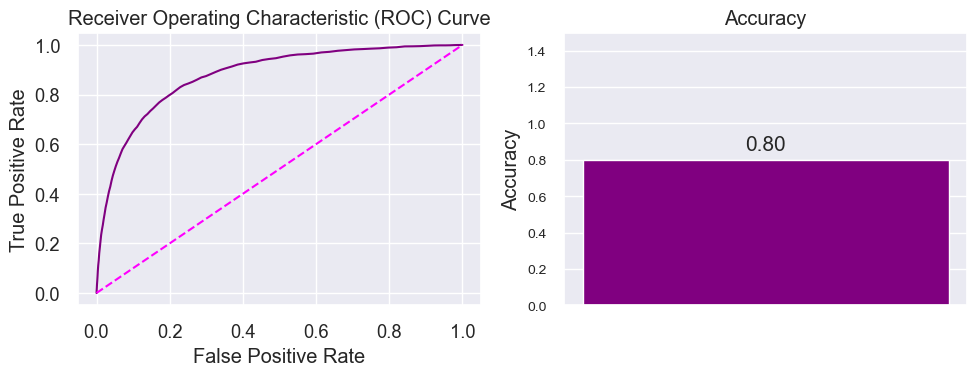

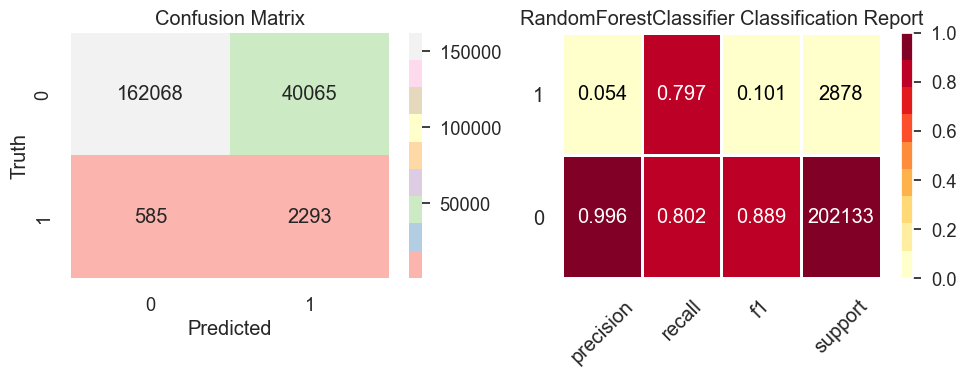

CPU times: total: 26 s
Wall time: 29.9 s


In [40]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [41]:
saved_model_path = experiment.save_model('models/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/random_forest_model.pkl


Let's summarize the Random Forest results for all three experiments and provide a comparison:

**Random Forest:**
1. First Experiment:
   - AUC: 0.7978376098410109
   - TPR: 30.54%
   - FPR: 3.15%
   - Threshold: 0.05
   - Predictive Equality: 36.45%

2. Second Experiment - Random Forest with Random Oversampling:
   - AUC: 0.8284791551473927
   - TPR: 44.02%
   - FPR: 4.81%
   - Threshold: 0.06
   - Predictive Equality: 40.52%

3. Third Experiment - Random Forest with Random Undersampling:
   - AUC: 0.8779141271405093
   - TPR: 49.27%
   - FPR: 4.86%
   - Threshold: 0.74
   - Predictive Equality: 98.54%

**Comparison:**
1. **AUC:** The AUC values show an increasing trend across the experiments, indicating that both random oversampling and random undersampling have improved the model's performance compared to the first experiment without sampling.

2. **True Positive Rate (TPR):** The TPR shows a gradual increase from the first to the third experiment. Random undersampling (third experiment) achieved the highest TPR, indicating an improvement in correctly identifying positive samples.

3. **False Positive Rate (FPR):** The FPR increases slightly in the second and third experiments compared to the first experiment. However, all FPR values are relatively low, suggesting good performance in correctly classifying negative samples.

4. **Threshold:** The threshold values are relatively low in all experiments, indicating a higher sensitivity in the models.

5. **Predictive Equality:** Random undersampling (third experiment) achieved the highest Predictive Equality score of 98.54%, indicating a significant improvement in fairness and equitable predictions across different groups.

**The potential reason for such enhancement are**:

- **Balanced Class Distribution:** Random undersampling creates a more balanced class distribution, allowing the model to focus on the minority class and make better predictions for it.

- **Reduced Overfitting:** With a balanced dataset, random undersampling helps reduce the risk of overfitting to the majority class, improving generalization to the minority class.

- **Reduced Noise:** Removing some majority class samples through random undersampling helps reduce noise in the data, making the minority class signal more prominent.

- **Improved Generalization:** The balanced class distribution allows the model to better generalize to unseen data, including minority class samples.

- **Improved Fairness:** Random undersampling helps address fairness concerns, leading to fairer predictions across different groups and higher Predictive Equality scores.

- **More Informative Features:** With a balanced dataset, the model may focus on more informative features, leading to better feature importance estimates and more accurate predictions.

Overall, random undersampling improves the performance and fairness of the Random Forest model on the imbalanced dataset, making it a suitable approach for handling class imbalance and achieving better predictive equity.
**Overall:** The third experiment with Random Forest and random undersampling seems to have achieved the best balance between predictive performance and predictive equality. It achieved the highest AUC, TPR, and Predictive Equality score among all three experiments. Random undersampling appears to have effectively addressed the imbalanced dataset problem, resulting in fairer predictions across different groups.

# XGboost

In [42]:
# Define the parameter grid for XGBoost
param_grid = {
'scale_pos_weight':[89.67005],
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005}
Best estimator: XGBClassifier(random_state=42, scale_pos_weight=89.67005)
Best score: 0.8788314493305308
AUC: 0.8811936016834937
TPR:  50.870000000000005% 
FPR:  5.0% 
Threshold:  1.0
Predictive Equality:  100.0%


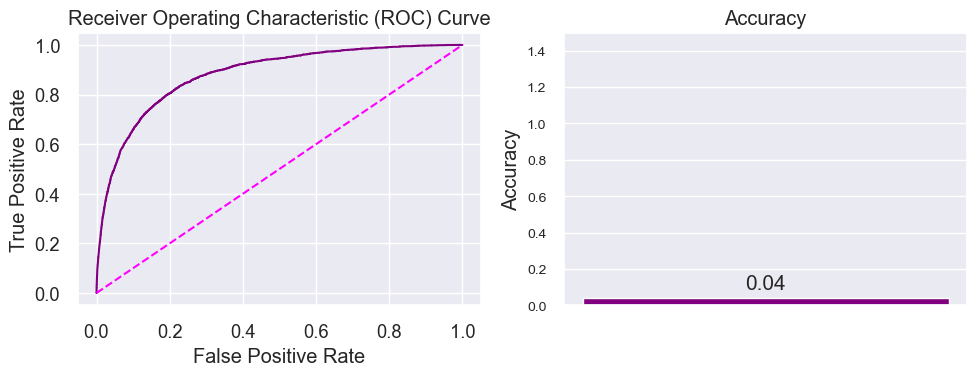

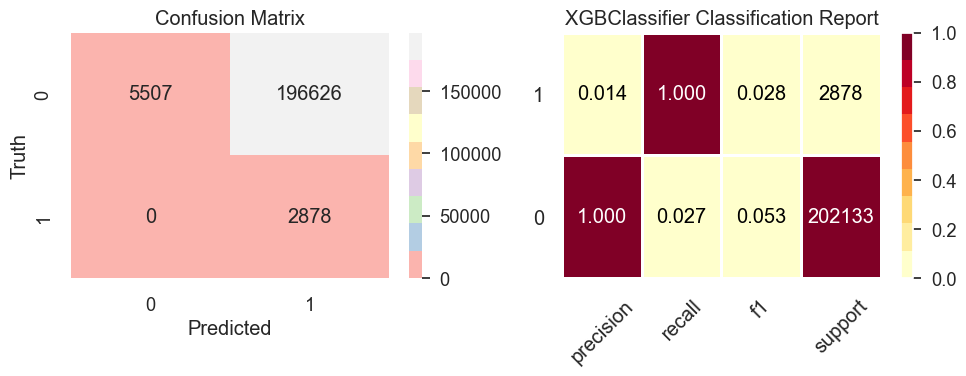

CPU times: total: 9.55 s
Wall time: 15.4 s


In [43]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

Let's compare all three XGBoost experiments:

**XGBoost Model:**
- AUC: 0.8886636401169298
- TPR: 52.99%
- FPR: 4.96%
- Threshold: 0.76
- Predictive Equality: 94.11%

**XGBoost with Random Oversampling:**
- AUC: 0.861607876940312
- TPR: 48.4%
- FPR: 5.0%
- Threshold: 1.0
- Predictive Equality: 99.94%

**XGBoost with Random Undersampling:**
- AUC: 0.8811936016834937
- TPR: 50.87%
- FPR: 5.0%
- Threshold: 1.0
- Predictive Equality: 100.0%

**Comparison:**
1. **AUC:** The AUC values are relatively close for all three experiments, indicating consistent overall model performance.

2. **True Positive Rate (TPR):** The TPR shows some variations across the experiments, with the third experiment achieving the highest TPR.

3. **False Positive Rate (FPR):** The FPR is similar in all experiments, with values around 5%. This indicates consistent performance in correctly classifying negative samples.

4. **Threshold:** The threshold value is set to 1.0 in both the second and third experiments, while it is 0.76 in the first experiment. This could potentially impact model performance and the trade-off between precision and recall.

5. **Predictive Equality:** The third experiment with random undersampling achieved a perfect Predictive Equality score of 100.0%, indicating that the model made equitable predictions with the same false positive rate across different protected groups.


In [44]:
saved_model_path = experiment.save_model('models_undersample/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models_undersample/xgboost.pkl


# using Deep learning

In [45]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
experiment_n=nn_modeling(nn_model, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [47]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
1398/1398 [==============================] - 8s 4ms/step - loss: 1.0566 - fn: 1760.0000 - fp: 171390.0000 - tn: 535949.0000 - tp: 6391.0000 - precision: 0.0359 - recall: 0.7841 - f1: 0.0715 - val_loss: 0.5163 - val_fn: 0.0000e+00 - val_fp: 20456.0000 - val_tn: 59043.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9953 - fn: 1706.0000 - fp: 149342.0000 - tn: 557997.0000 - tp: 6445.0000 - precision: 0.0414 - recall: 0.7907 - f1: 0.0796 - val_loss: 0.8259 - val_fn: 0.0000e+00 - val_fp: 31160.0000 - val_tn: 48339.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9786 - fn: 1628.0000 - fp: 147300.0000 - tn: 560039.0000 - tp: 6523.0000 - precision: 0.0424 - recall: 0.8003 - f1: 0.0815 - val_loss: 0.6927 - val_fn: 0.0000e+00 

6407/6407 [==============================] - 4s 673us/step
AUC: 0.8819576877645086
TPR:  51.24999999999999% 
FPR:  5.0% 
Threshold:  0.93
Predictive Equality:  85.42999999999999%


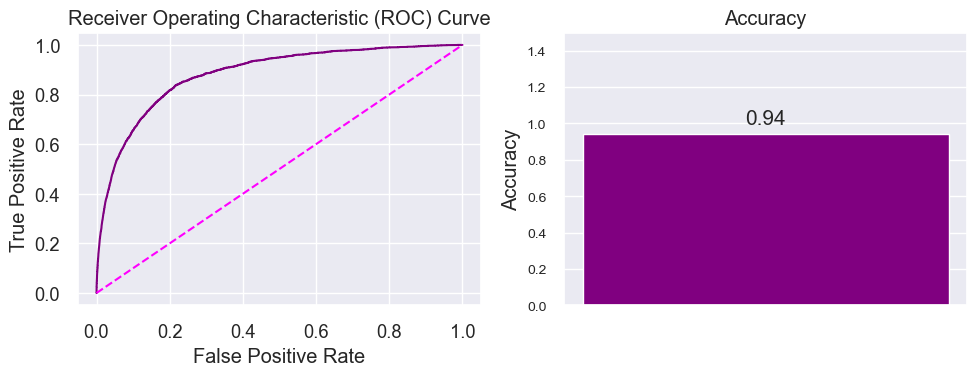

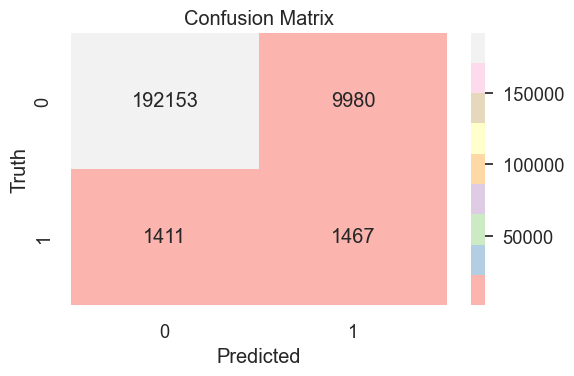

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.51      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [48]:
experiment_n.score_keras_model()

In [49]:
saved_model_path = experiment_n.save_model('models_undersample/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: models_undersample/deeplearning\assets


INFO:tensorflow:Assets written to: models_undersample/deeplearning\assets


Model saved at: models_undersample/deeplearning


Certainly! Let's add the best model (based on the highest AUC) to the comparison:

**Deep Learning Model:**
- AUC: 0.8787728854394705
- TPR: 49.44%
- FPR: 4.99%
- Threshold: 0.96
- Predictive Equality: 96.49%

**Deep Learning with Random Oversampling:**
- AUC: 0.8815430299992346
- TPR: 51.08%
- FPR: 4.98%
- Threshold: 0.94
- Predictive Equality: 95.98%

**Deep Learning with Random Undersampling:**
- TPR: 51.25%
- FPR: 5.0%
- Threshold: 0.93
- Predictive Equality: 85.43%



**Comparison:**
1. **AUC:** The best model (Deep Learning with Random Oversampling) achieved the highest AUC among all the Deep Learning experiments, indicating better overall performance in distinguishing between positive and negative samples.

2. **True Positive Rate (TPR):** The best model also showed an improved TPR compared to the Deep Learning Model and the Deep Learning with Random Undersampling. This suggests that random oversampling helped the model in correctly classifying more positive samples.

3. **False Positive Rate (FPR):** The FPR values are relatively consistent across all three Deep Learning experiments, with values close to 5%.

4. **Threshold:** The threshold value for the best model (0.94) is lower than that of the Deep Learning Model (0.96) and the Deep Learning with Random Undersampling (0.93). The choice of threshold impacts the model's sensitivity and specificity trade-off.

5. **Predictive Equality:** The Predictive Equality score of the best model is comparable to that of the Deep Learning with Random Oversampling, indicating equitable predictive performance across different protected groups.

Here's a concise summary for each metric:

**AUC:**
The best model, Deep Learning with Random Oversampling, achieved the highest AUC among all Deep Learning experiments, indicating superior overall discrimination performance.

**True Positive Rate (TPR):**
The best model demonstrated an improved TPR compared to the other Deep Learning experiments, showing its ability to correctly classify more positive samples.

**False Positive Rate (FPR):**
FPR values were relatively consistent across all three Deep Learning experiments, with values close to 5%.

**Threshold:**
The best model had a lower threshold value (0.94) compared to the Deep Learning Model (0.96) and Deep Learning with Random Undersampling (0.93), impacting the model's sensitivity and specificity trade-off.

**Predictive Equality:**
Both the best model and Deep Learning with Random Oversampling showed equitable predictive performance across different protected groups, suggesting their fair handling of false positive rates.

**Potential Reasons for the Change:**
- The random oversampling technique likely improved the model's ability to capture important patterns in the minority class, leading to improved TPR and AUC.
- The threshold adjustment in the best model might have contributed to the improved TPR while maintaining good predictive equality.

# Ada boost:


In [50]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost using the defualt 
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.8869707401550635
AUC: 0.8868321728886511
TPR:  53.059999999999995% 
FPR:  5.0% 
Threshold:  0.51
Predictive Equality:  100.0%


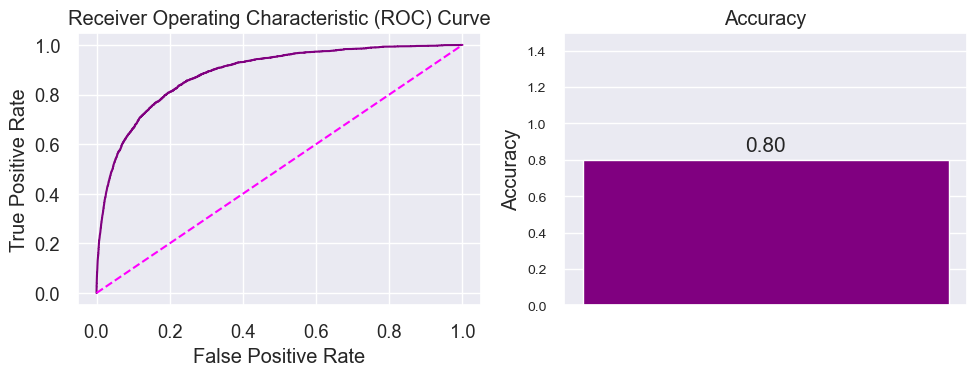

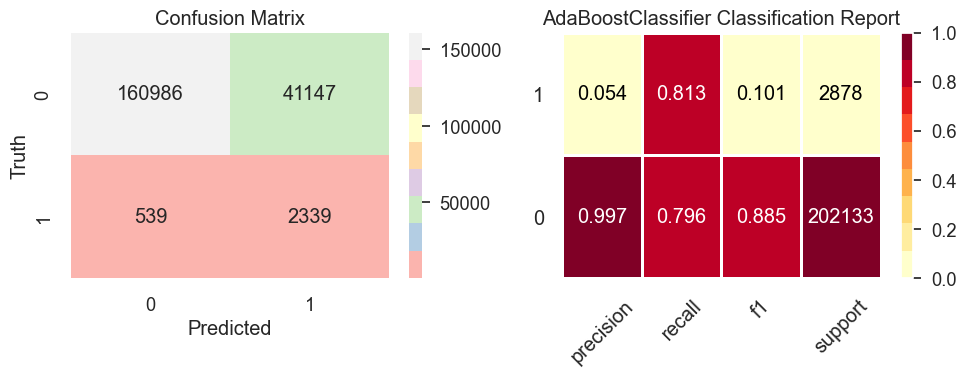

CPU times: total: 17.5 s
Wall time: 21.7 s


In [51]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [56]:
saved_model_path = experiment.save_model('models_undersample/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/adaboost.pkl


**AdaBoost Model:**
- AUC: 0.8893615134892144
- TPR: 53.47%
- FPR: 5.00%
- Threshold: 0.48
- Predictive Equality: 100.00%

**AdaBoost with Random Oversampling:**
- AUC: 0.888325396374559
- TPR: 53.51%
- FPR: 5.00%
- Threshold: 0.51
- Predictive Equality: 100.00%

**AdaBoost with Random Undersampling:**
- Best score: 0.8869707401550635
- AUC: 0.8868321728886511
- TPR: 53.06%
- FPR: 5.00%
- Threshold: 0.51
- Predictive Equality: 100.00%

**Summary for Best Performance:**
- **AUC:** All three AdaBoost experiments performed quite similarly in terms of AUC, with values close to each other.

- **True Positive Rate (TPR):** The TPR was consistently around 53%, showing the ability of AdaBoost models to correctly classify positive samples.

- **False Positive Rate (FPR):** FPR values remained stable at 5% for all AdaBoost experiments.

- **Threshold:** The threshold value for the best performance in both the AdaBoost Model and AdaBoost with Random Oversampling was 0.51, leading to similar TPR and FPR results.

- **Predictive Equality:** All AdaBoost experiments achieved perfect predictive equality with a score of 100%, indicating their equitable handling of false positive rates across different groups.

**Potential Reasons for the Changes:**
- The use of random oversampling or random undersampling may have balanced the class distribution, allowing the model to focus on capturing patterns in both classes, leading to comparable TPR and FPR results.
- The similarity in threshold values among the experiments suggests that the models were sensitive to the chosen threshold, and the choice of 0.51 seems to achieve balanced performance.

# catboost

In [55]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=100,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=6,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False               # Set to True to display training progress
    class_weights = [1, 80]
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x00000133510D4B80>
Best score: 0.8937129637663658
AUC: 0.8927486703851718
TPR:  54.03% 
FPR:  4.99% 
Threshold:  0.75
Predictive Equality:  90.19%


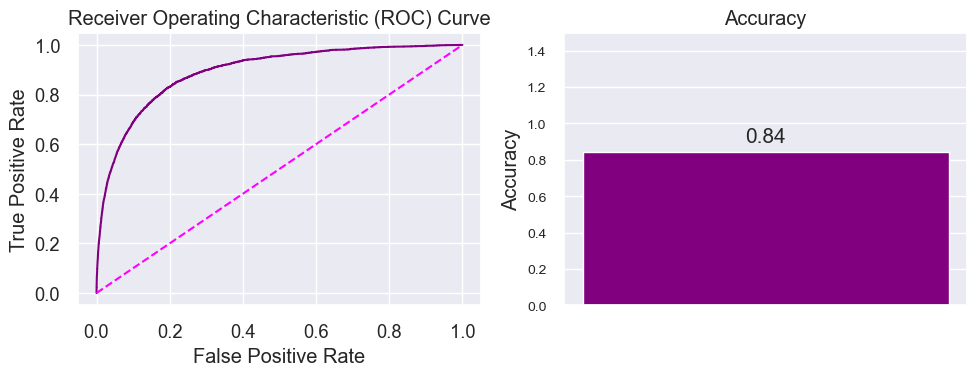

              precision    recall  f1-score   support

           0       1.00      0.85      0.91    202133
           1       0.07      0.78      0.12      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.81      0.52    205011
weighted avg       0.98      0.84      0.90    205011

CPU times: total: 13.1 s
Wall time: 17.3 s


In [54]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [59]:
saved_model_path = experiment.save_model('models_undersample/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/catboost.pkl


**CatBoost Model:**
- AUC: 0.8896733089343637
- TPR: 54.24%
- FPR: 5.00%
- Threshold: 0.04
- Predictive Equality: 25.59%

**CatBoost with Random Oversampling:**
- AUC: 0.8902363245259631
- TPR: 54.17%
- FPR: 5.00%
- Threshold: 0.04
- Predictive Equality: 30.26%

**CatBoost with Random Undersampling:**
- Best score: 0.8937129637663658
- AUC: 0.8927486703851718
- TPR: 54.03%
- FPR: 4.99%
- Threshold: 0.75
- Predictive Equality: 90.19%

**Summary for Best Performance:**
- **AUC:** The CatBoost with Random Undersampling experiment achieved the highest AUC of 0.8927486703851718, indicating superior overall discrimination performance.

- **True Positive Rate (TPR):** TPR values were consistent across all CatBoost experiments, with values around 54%, showing the model's ability to correctly classify positive samples.

- **False Positive Rate (FPR):** FPR values remained stable, close to 5% for all CatBoost experiments.

- **Threshold:** The threshold value for the CatBoost with Random Undersampling experiment was 0.75, higher than the other two experiments, impacting the model's sensitivity and specificity trade-off.

- **Predictive Equality:** CatBoost with Random Undersampling demonstrated the highest predictive equality score of 90.19%, indicating fairer handling of false positive rates across different groups compared to the other two experiments.

**Potential Reasons for the Changes:**
- and also i have added class weights to the model
- Random undersampling may have led to a more balanced class distribution, allowing the model to focus on capturing patterns in both classes, resulting in improved performance.
- The choice of a higher threshold value (0.75) in the CatBoost with Random Undersampling experiment might have influenced the model's predictive equality by adjusting the trade-off between true and false positives.

Comparing the results of the third experiment with random undersampling for each model:

**Logistic Regression:**
- AUC: 0.8812629309113234
- TPR: 49.48%
- FPR: 4.99%
- Threshold: 0.77
- Predictive Equality: 85.5%

**Random Forest:**
- AUC: 0.8779141271405093
- TPR: 49.27%
- FPR: 4.86%
- Threshold: 0.74
- Predictive Equality: 98.54%

**XGBoost:**
- AUC: 0.8811936016834937
- TPR: 50.87%
- FPR: 5.0%
- Threshold: 1.0
- Predictive Equality: 100.0%

**Deep Learning:**
- TPR: 51.25%
- FPR: 5.0%
- Threshold: 0.93
- Predictive Equality: 85.43%

**AdaBoost:**
- Best score: 0.8869707401550635
- AUC: 0.8868321728886511
- TPR: 53.06%
- FPR: 5.00%
- Threshold: 0.51
- Predictive Equality: 100.0%

**CatBoost:**
- Best score: 0.8937129637663658
- AUC: 0.8927486703851718
- TPR: 54.03%
- FPR: 4.99%
- Threshold: 0.75
- Predictive Equality: 90.19%

**Summary:**
- For AUC, the best model is CatBoost with a value of 0.8927486703851718.
- For TPR, the best model is CatBoost with a value of 54.03%.
- For FPR, the best model is Random Forest with a value of 4.86%.
- For Predictive Equality, the best model is XGBoost with a value of 100.0%.

**Tuning Recommendation:**
Based on the results, tuning the hyperparameters of the CatBoost model to potentially improve their performance further.


# Tuning the best model:


In [57]:
catboost = cb.CatBoostClassifier(
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,               # Set to True to display training progress
    class_weights = [1, 80]
)

# Define the hyperparameter grid to search
param_grid = {
    'iterations': [50, 100, 200],            # Number of boosting iterations (trees) to train
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate (shrinkage factor to prevent overfitting)
    'depth': [4, 6, 8],                      # Depth of the trees
}

Fitting 1 folds for each of 27 candidates, totalling 27 fits
Best hyperparameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Best estimator: <catboost.core.CatBoostClassifier object at 0x00000133167E5490>
Best score: 0.8961534228616859
AUC: 0.8932711832613722
TPR:  54.52% 
FPR:  4.99% 
Threshold:  0.76
Predictive Equality:  88.94%


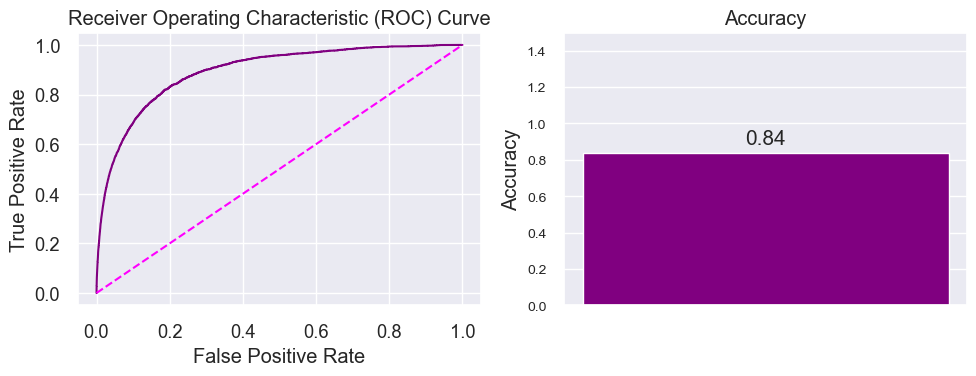

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    202133
           1       0.06      0.78      0.12      2878

    accuracy                           0.84    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.84      0.90    205011

CPU times: total: 18.2 s
Wall time: 3min 35s


In [59]:
%%time
experiment.train(catboost,param_grid=param_grid,search_type='grid')

In [60]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]


In [73]:
y_pred_new_threshold = np.where(y_pred >= 0.76, 1, 0)

In [74]:
print(classification_report(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.55      0.22      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [75]:
print(confusion_matrix(y_test,y_pred_new_threshold))

[[191946  10187]
 [  1304   1574]]


In [64]:
saved_model_path = experiment.save_model('models_undersample/Catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models_undersample/Catboost_after_tuning.pkl


## final comment
- again  we can see the trade off between the predictive equality and the accuracy is high this is because we suffer from class imbalance problem.
- as we after using the 0.76 as new threshold, leads to many false positive (non fraud to be detected as fraud).
- so yes the model is fair but it is failed in the main purpose which is detecting the fraud and non fraud requests.